# **Project Name**    - CardioVascular Risk Prediction Using Classification






##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** VISHNU S
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The project aimed to predict the 10-year risk of coronary heart disease (CHD) using machine learning on data from a cardiovascular study. The dataset, comprising 4,000+ patients and 15 attributes, included demographic, behavioral, and medical risk factors.

Data preprocessing involved cleaning missing values using median, mode, and KNN imputation, removing outliers with the IQR method, and transforming skewed variables. Feature selection eliminated multicollinearity using VIF, created the pulse pressure feature, and identified key predictors like age, sex, smoking, cholesterol, and glucose.

To address class imbalance, SMOTE with Tomek links was applied, and features were scaled using standardization. After testing several models, a tuned Nayve Bayes was selected for its high recall, prioritizing the identification of CHD risk.

This project showcased the effective use of machine learning for accurate CHD risk prediction through thorough data preparation, feature engineering, and model selection.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the US.
The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import Sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# View last 5 rows of the dataset
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  3390
Number of columns are:  17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df[df.duplicated()].sum()

id                   0
age                  0
education          0.0
sex                  0
is_smoking           0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD           0
dtype: object

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

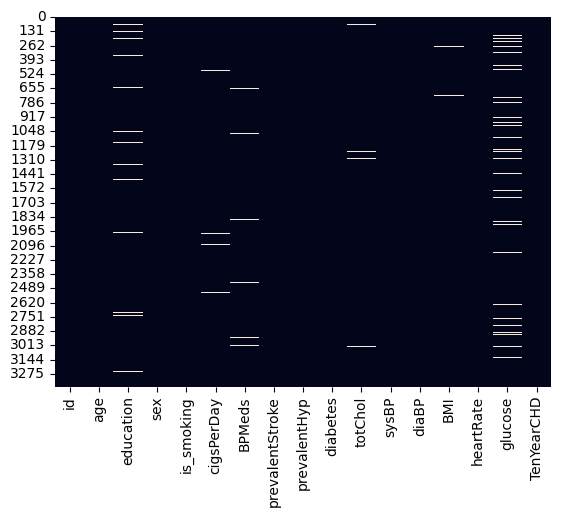

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

There are a total of 16 feature columns where 'TenYearCHD' is the dependent variable column. The total number of observations(rows) are 3390.

There are no duplicate rows in the dataset.

Also there are missing values in the columns education, cigs per day, BP meds, totChol, BMI, heart rate and glucose.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

 **Demographic Information:**  
- **Sex:** Indicates whether the individual is male or female ("M" for male, "F" for female).  
- **Age:** The individual's age, recorded as whole numbers but conceptually treated as a continuous variable.  
- **Education:** Represents the individual's education level, categorized into four groups (1, 2, 3, or 4).  

**Behavioral Attributes:**  
- **is_smoking:** Specifies if the individual is a current smoker ("YES" for smokers, "NO" for non-smokers).  
- **Cigs Per Day:** The average number of cigarettes smoked daily by the individual. This is treated as a continuous variable since it can include fractional values, such as half a cigarette.  

**Medical History:**  
- **BP Meds:** Indicates if the individual is on medication for blood pressure (nominal variable).  
- **Prevalent Stroke:** Identifies whether the individual has a history of stroke (nominal variable).  
- **Prevalent Hyp:** Indicates if the individual has been diagnosed with hypertension (nominal variable).  
- **Diabetes:** Shows whether the individual has been diagnosed with diabetes (nominal variable).  

**Current Medical Measurements:**  
- **Tot Chol:** The individual's total cholesterol level, treated as a continuous variable.  
- **Sys BP:** Systolic blood pressure, measured as a continuous variable.  
- **Dia BP:** Diastolic blood pressure, treated as a continuous variable.  
- **BMI:** The Body Mass Index of the individual, considered continuous.  
- **Heart Rate:** The number of heartbeats per minute. Although discrete by nature, it is treated as continuous due to the wide range of possible values.  
- **Glucose:** The glucose level in the individual's blood, treated as continuous.  

**Target Variable:**  
- **TenYearCHD:** Indicates whether the individual is at risk of developing coronary heart disease within 10 years. This is a binary variable, where "1" means "Yes" and "0" means "No."






### Check Unique Values for each variable.

In [ ]:
#Quick Glance
#-------------

#dataset.columns - Gives all columns in the dataset  ( Index(['id', 'vendor_id', 'pickup_datetime' ....)

#dataset.columns.tolist() - Converts to a list (['id','vendor_id','pickup_datetime',..... )

#dataset['age'].nunique() -Gives the number of unique values

#dataset['educationl'].unique() -Gives the unique values

In [ ]:
# Check Unique Values for each variable.

# using a for loop
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())
  print("Unique values are:",df[i].unique())


No. of unique values in id is 3390
Unique values are: [   0    1    2 ... 3387 3388 3389]
No. of unique values in age is 39
Unique values are: [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
No. of unique values in education is 4
Unique values are: [ 2.  4.  1.  3. nan]
No. of unique values in sex is 2
Unique values are: ['F' 'M']
No. of unique values in is_smoking is 2
Unique values are: ['YES' 'NO']
No. of unique values in cigsPerDay is 32
Unique values are: [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
No. of unique values in BPMeds is 2
Unique values are: [ 0. nan  1.]
No. of unique values in prevalentStroke is 2
Unique values are: [0 1]
No. of unique values in prevalentHyp is 2
Unique values are: [0 1]
No. of unique values in diabetes is 2
Unique values are: [0 1]
No. of unique values in totChol is 240
Unique values are: [

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Before doing any data wrangling lets create copy of the dataset
dataset = df.copy()

In [ ]:
# Renaming the columns
dataset.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [ ]:
# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']

categorical_var = [i for i in dataset.columns if dataset[i].nunique()<=4]

continuous_var = [i for i in dataset.columns if i not in categorical_var]

In [ ]:
print(categorical_var)
print(continuous_var)

['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']
['id', 'age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


### What all manipulations have you done and insights you found?

I renamed all the columns for simplicity and defined the continuous variables, dependent variable, and categorical variables to facilitate graph plotting.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

ten_year_chd
0    2879
1     511
Name: count, dtype: int64
 


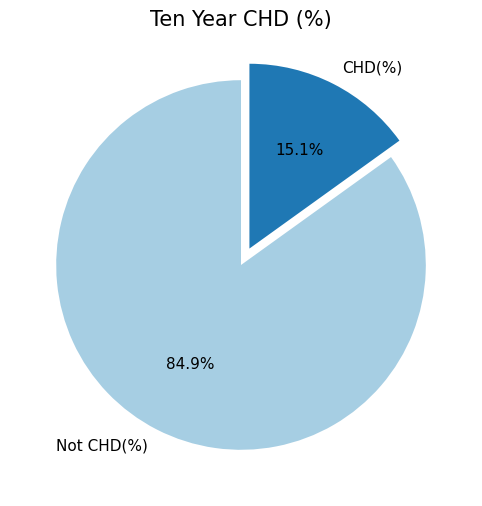

In [ ]:
# Chart - 1 visualization code

# Dependant Column Value Counts
print(dataset.ten_year_chd.value_counts())
print(" ")

#color palette selection
colors = sns.color_palette("Paired")

# plotting data on chart
plt.figure(figsize=(10,6))
explode = [0,0.1]
textprops = {'fontsize':11}
plt.pie(dataset['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=15)

# displaying chart
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that 15.1% that is 511 out of 3390 are classified as positive for 10 year CHD whereas the remaining 84.9% that is 2879 out of 3390 are classified as negative for 10 year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart show that 15.1% of the population has a positive classification for 10-year CHD, while 84.9% have a negative classification. This information can help businesses in the healthcare industry develop targeted strategies. There are no specific insights in the chart that indicate negative growth, but failure to address high CHD prevalence could have negative implications for public health and healthcare businesses.

#### Chart - 2

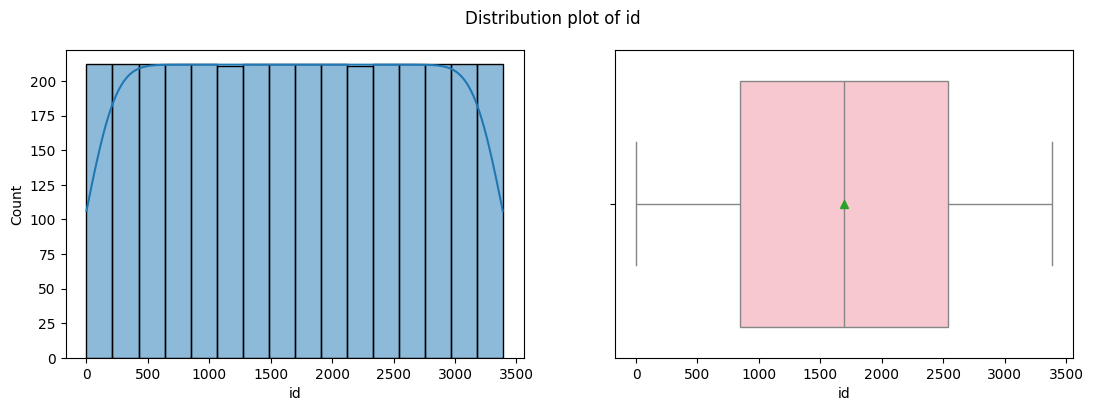

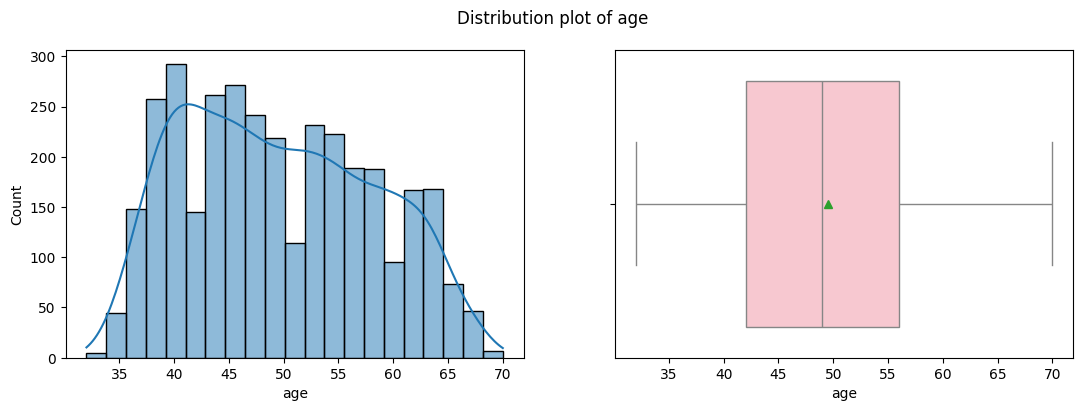

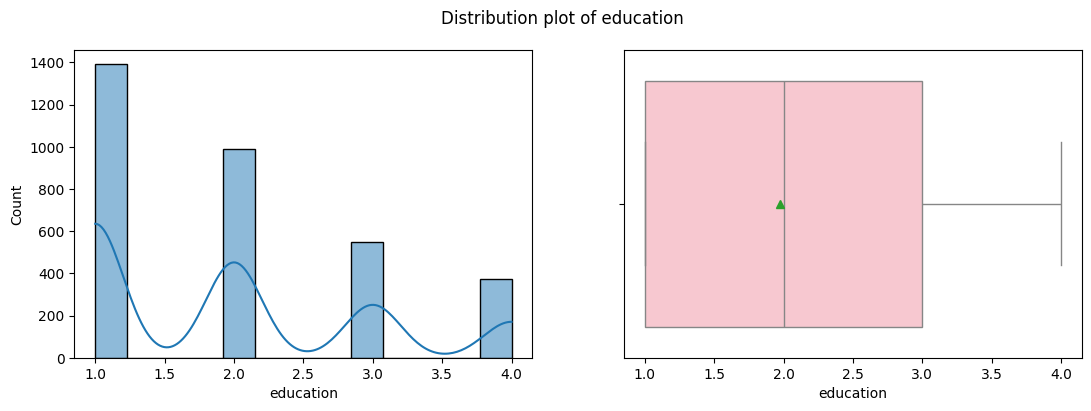

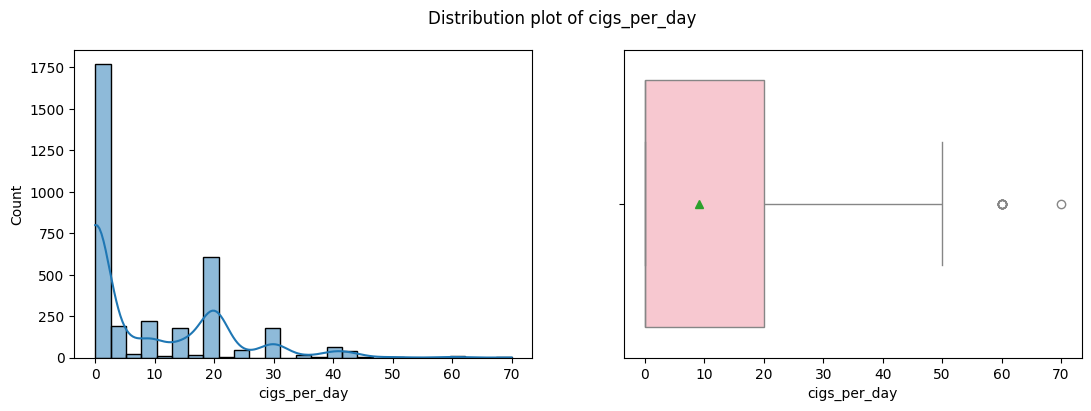

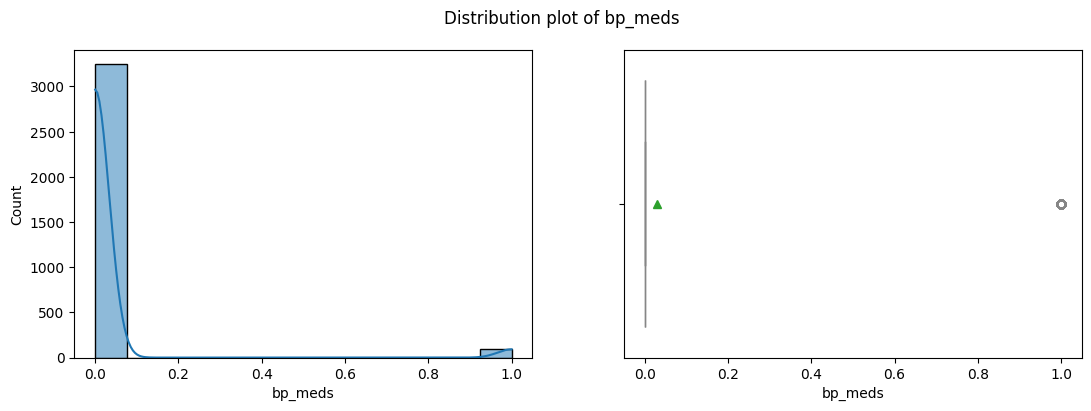

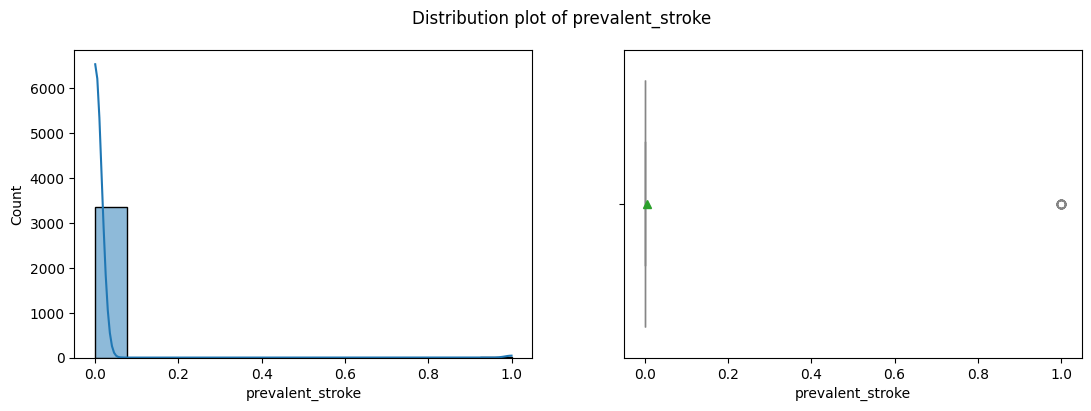

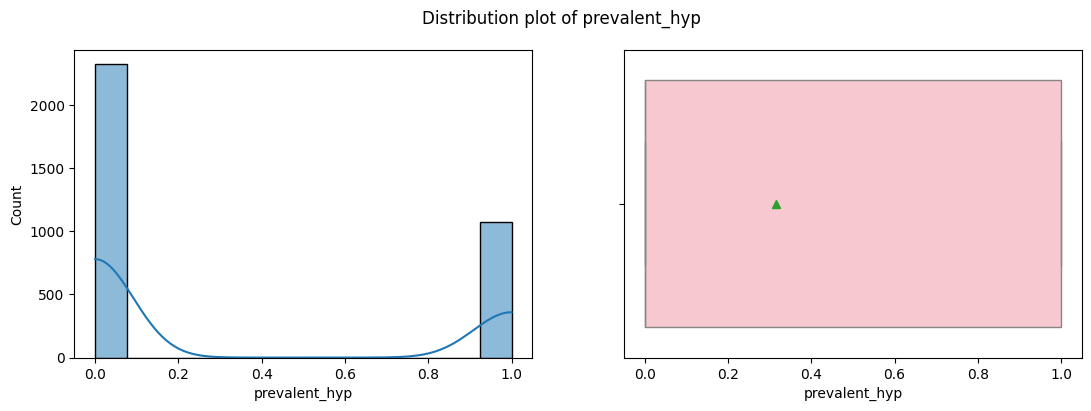

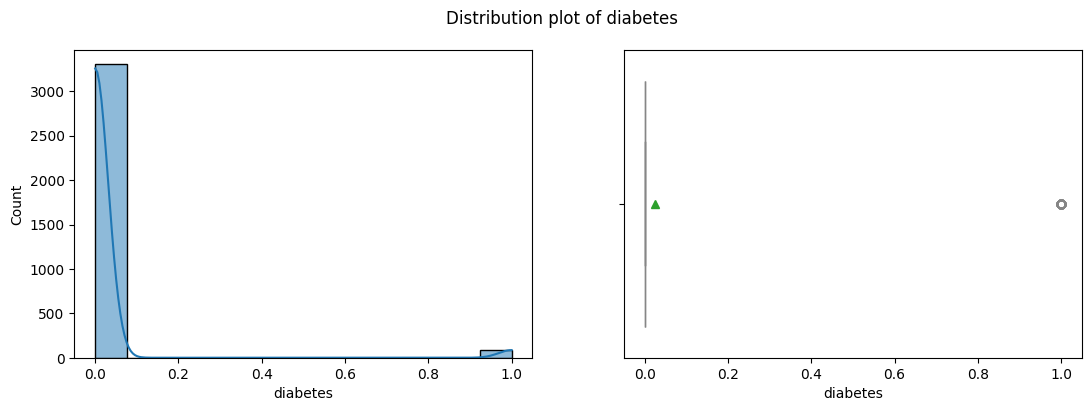

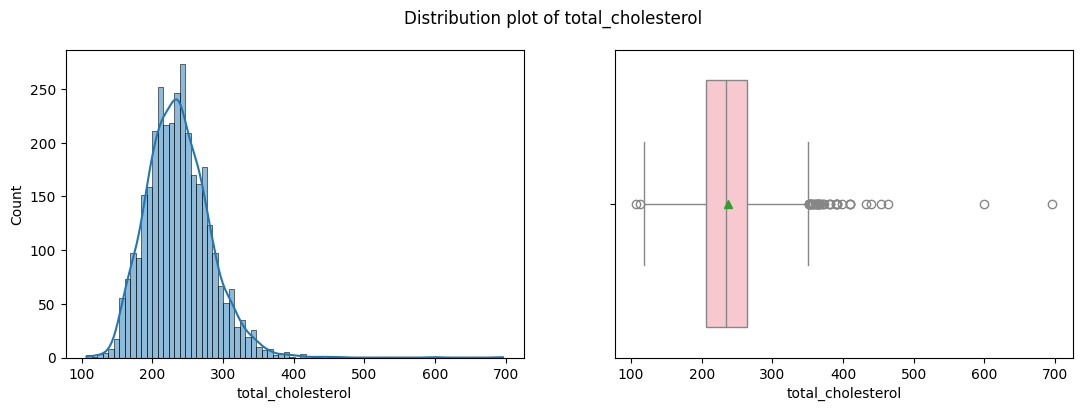

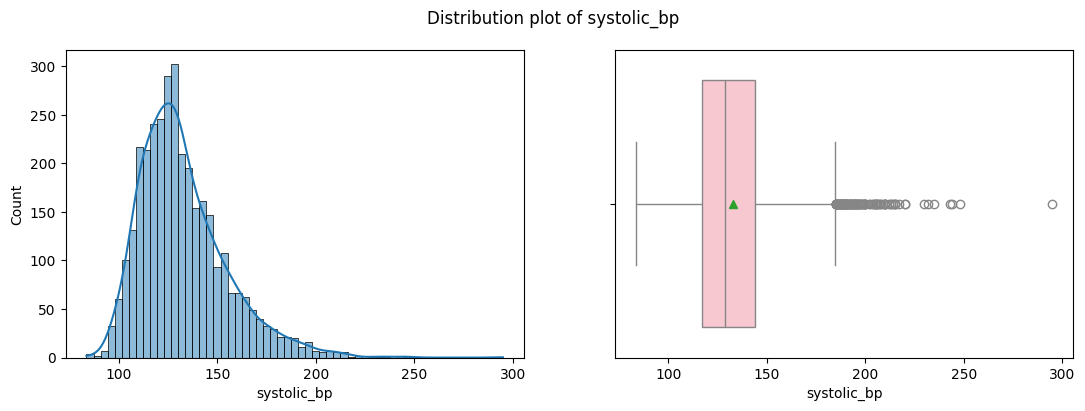

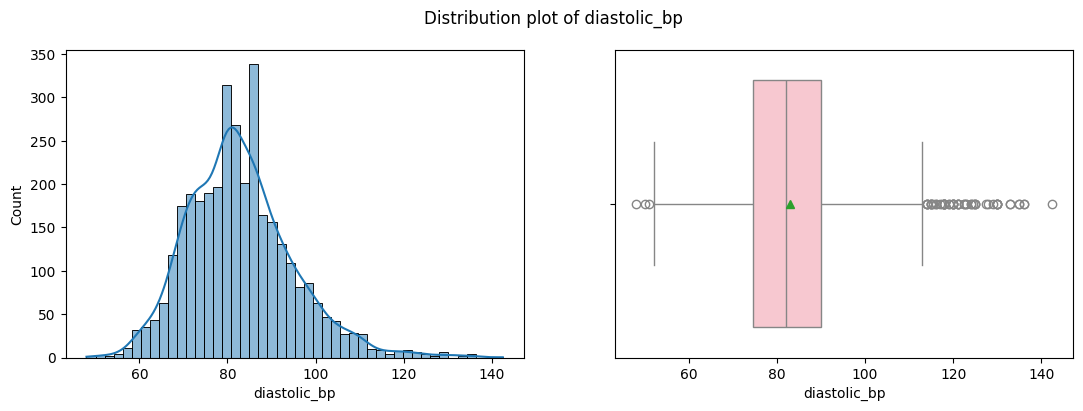

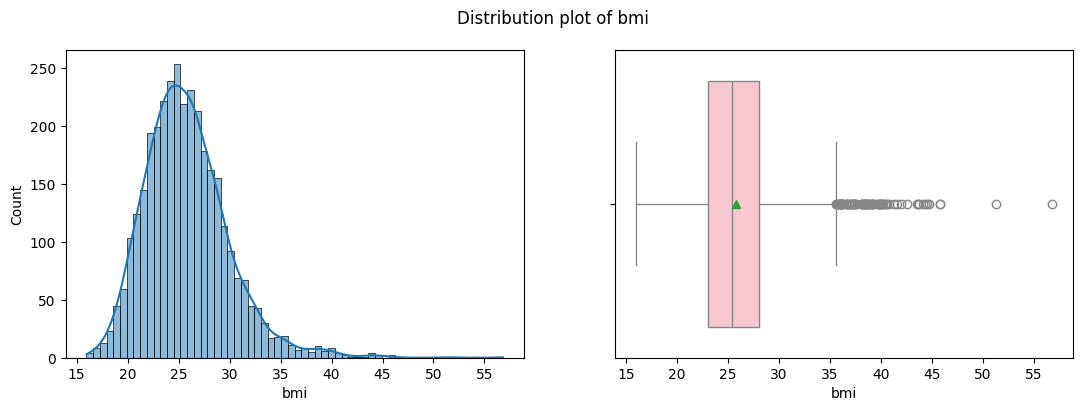

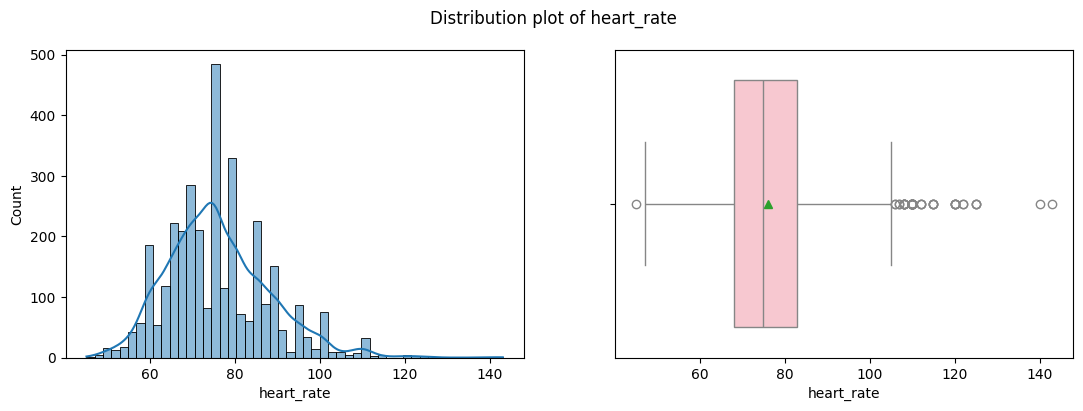

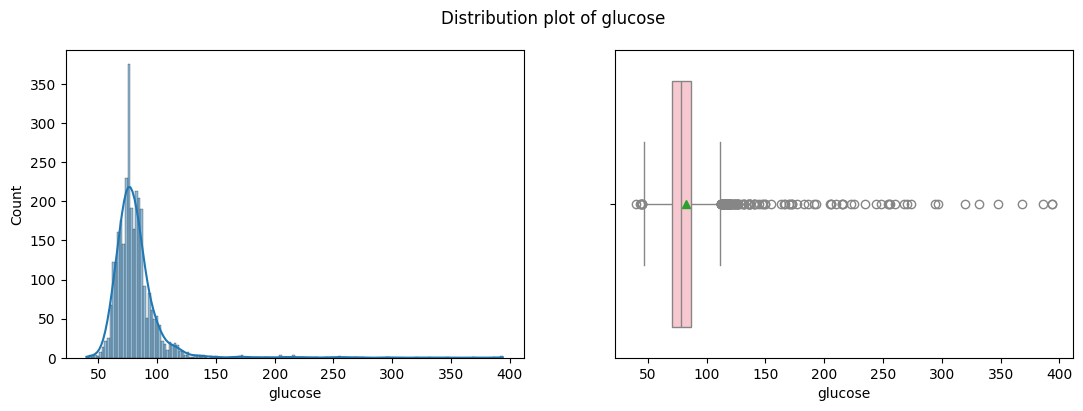

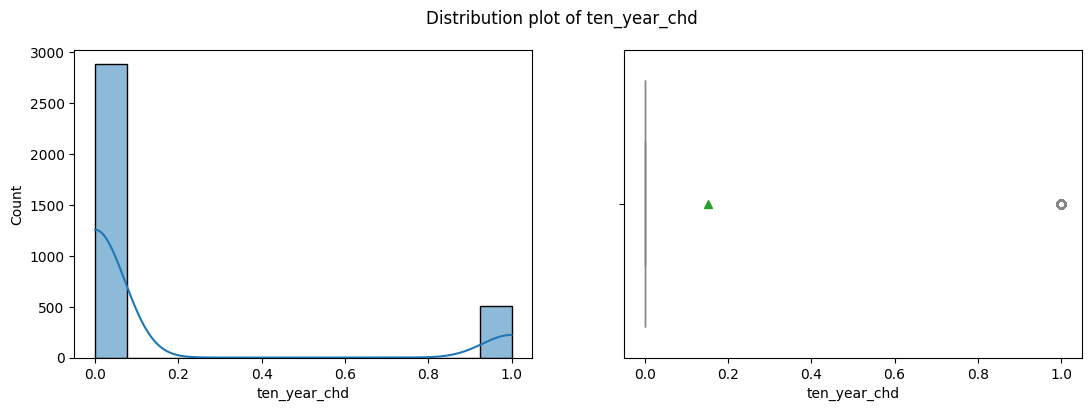

In [ ]:
# Chart - 2 visualization code

for col in dataset.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(dataset[col], ax = axes[0],kde = True)
    sns.boxplot(dataset[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which i will handle later before model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset and the outliers in the boxplot for the different continuous columns.

#### Chart - 3

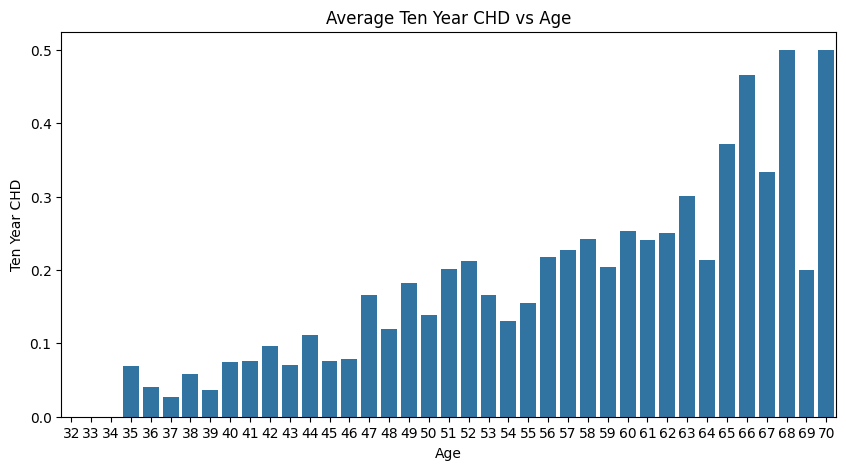

In [ ]:
# Chart - 3 visualization code

# Ploting Bar Chart
# Group by Age and get average CHD for 10 year, and precent change
avg_CHD = dataset.groupby('age')['ten_year_chd'].mean().reset_index()

# Plot average CHD over different age
plt.figure(figsize=(10,5))
ax = sns.barplot(x= avg_CHD['age'], y= avg_CHD['ten_year_chd'])
ax.set_ylabel("Ten Year CHD")
ax.set_xlabel("Age")
ax.set_title('Average Ten Year CHD vs Age')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics such as percentages.

To show the average CHD of 10 year for different age group in a clear and feasible way, i have used Bar chart here.

##### 2. What is/are the insight(s) found from the chart?

From above bar plot we can clearly see that the average CHD is high for above 65+ aged peoples. But a sudden drop in 67 and 69 year old group (CHD value is low there). And also for below 65 year, the CHD is much less.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high value of CHD for old aged people(65-70 year). So, as a suggestion the need for targeted preventive measures or specialized treatments for this demographic.

#### Chart - 4

<Figure size 1000x500 with 0 Axes>

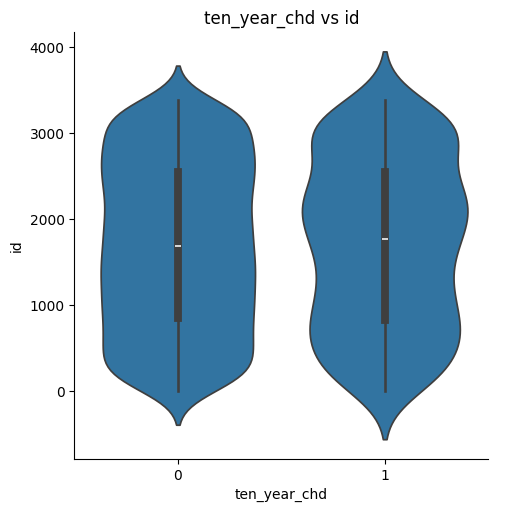

<Figure size 1000x500 with 0 Axes>

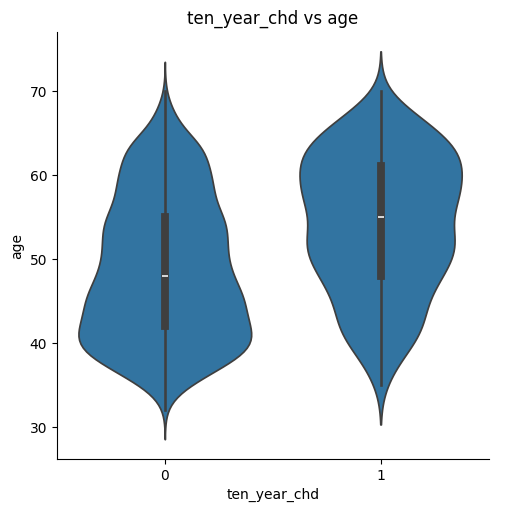

<Figure size 1000x500 with 0 Axes>

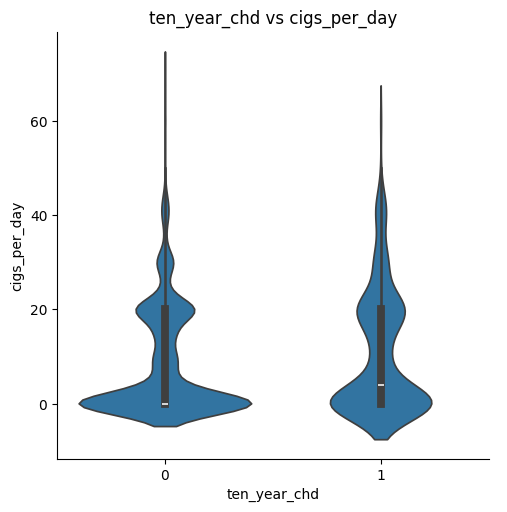

<Figure size 1000x500 with 0 Axes>

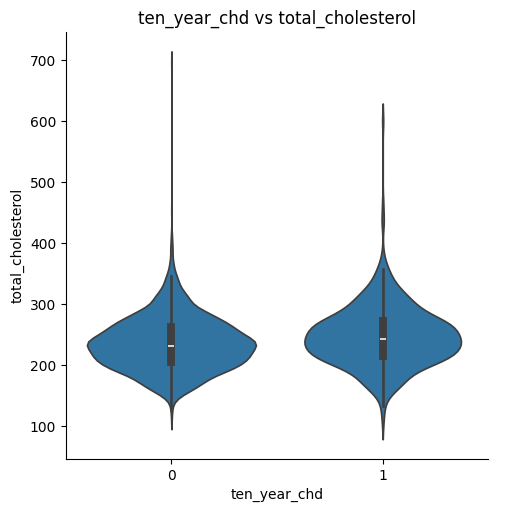

<Figure size 1000x500 with 0 Axes>

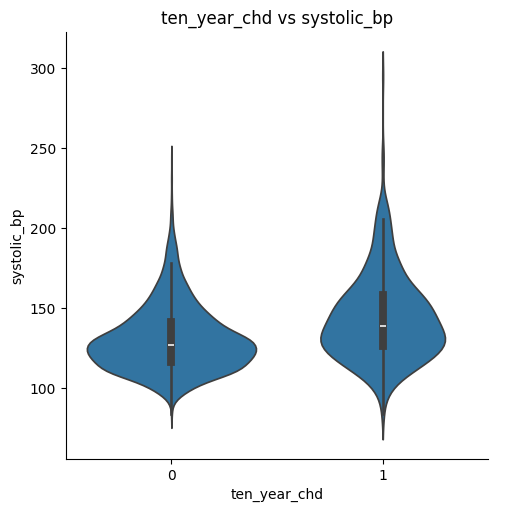

<Figure size 1000x500 with 0 Axes>

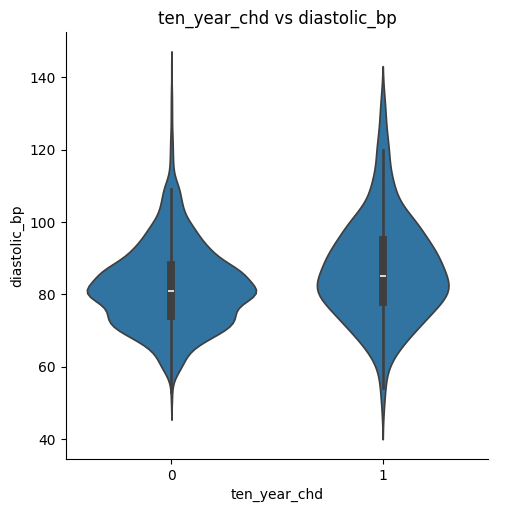

<Figure size 1000x500 with 0 Axes>

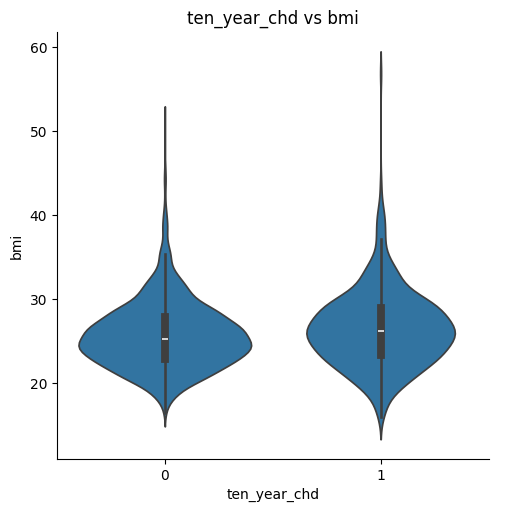

<Figure size 1000x500 with 0 Axes>

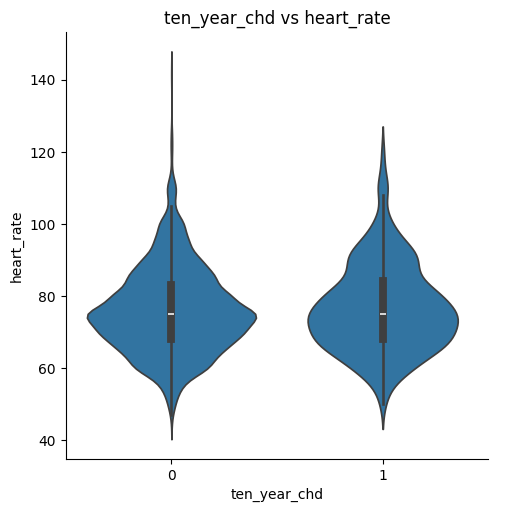

<Figure size 1000x500 with 0 Axes>

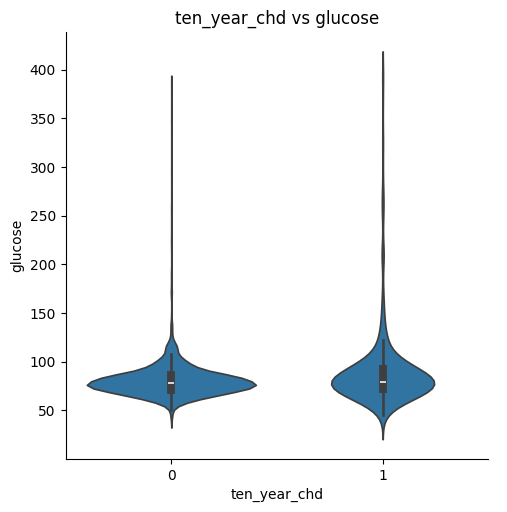

In [ ]:
# Chart - 4 visualization code

# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=dataset,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

##### 1. Why did you pick the specific chart?

The violin chart is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to display the distribution and density of data across different categories or groups. Some features of the violin chart include:

Shape and width: The shape of the violin represents the data distribution, typically displaying a mirrored, symmetrical shape. The width of the violin at different points indicates the density of data.

Quartiles and median: The central "box" in the violin chart represents the interquartile range (IQR) and contains the median value. This provides insights into the spread and central tendency of the data.

Grouping and comparison: Violin charts can be grouped or arranged side by side to compare distributions across different categories or groups. This allows for visual comparisons of data distribution shapes, spreads, and densities.

##### 2. What is/are the insight(s) found from the chart?

For age vs ten_year_chd, we see that the density for positive cases is high at higher age as compared to lower age indicating that the positive cases are higher in older people.

For cigs_per_day, the negative cases are more for the non smokers compared to the positive cases for non smokers.

For ten_year_chd and glucose, the negative cases have high density compared to the positive cases for the same value of glucose.

The remaining charts do not provide much information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution and density of data across different categories can help businesses identify patterns, trends, and potential areas of focus. For example, the insight that positive cases of ten-year CHD are higher in older people suggests the need for targeted preventive measures or specialized treatments for this demographic. Similarly, the insight regarding the relationship between smoking and negative cases of CHD can inform smoking cessation programs or campaigns to reduce the risk of CHD.

While the insights gained from the chart can be valuable, it's important to note that the impact on business growth would depend on various factors. The actual business impact would require further analysis and strategic implementation of these insights. Additionally, without specific business context and objectives, it is challenging to determine if there are any insights that would directly lead to negative growth. However, using the insights to better understand the distribution of health conditions and risk factors can potentially help businesses in the healthcare industry develop more effective strategies and interventions to improve patient outcomes and drive positive growth.

#### Chart - 5

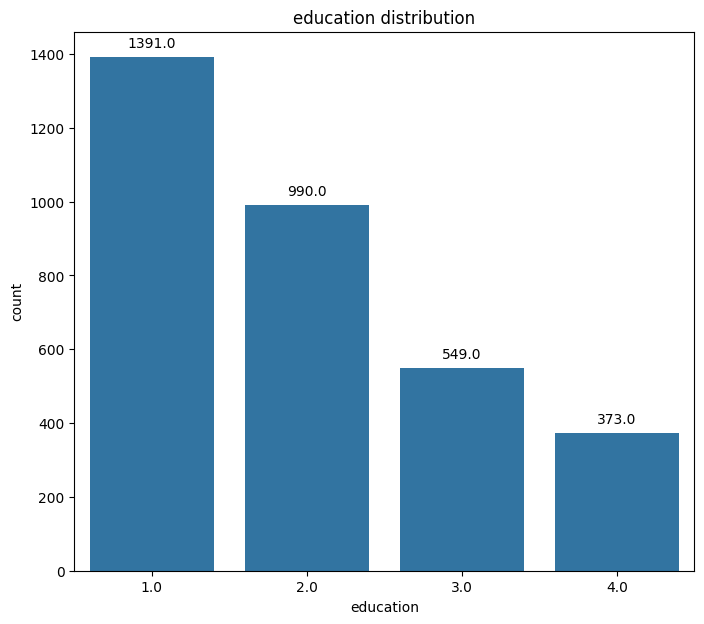

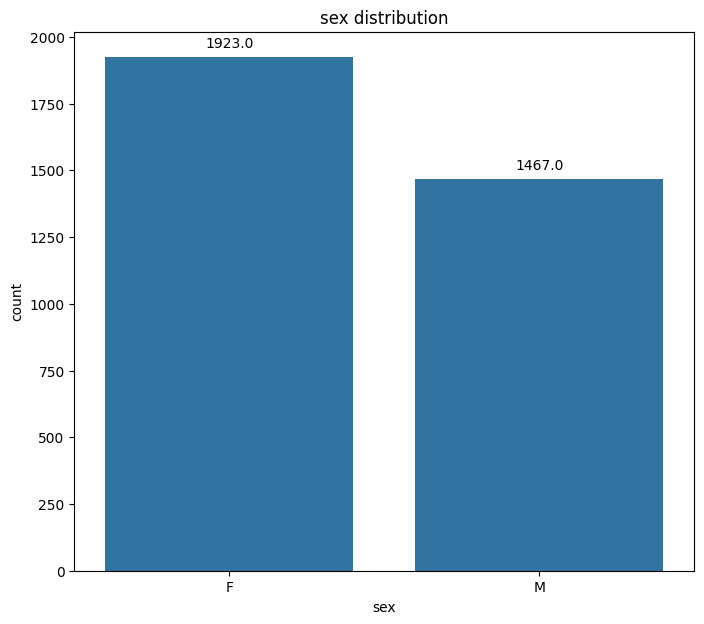

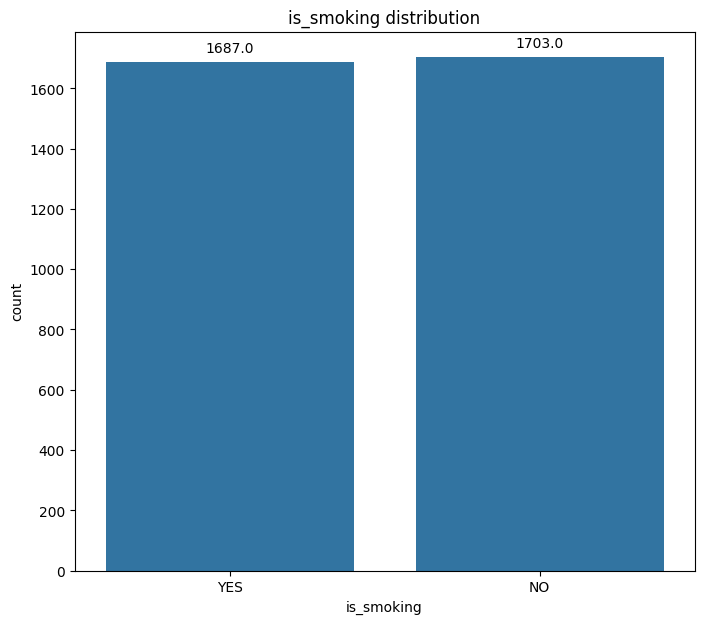

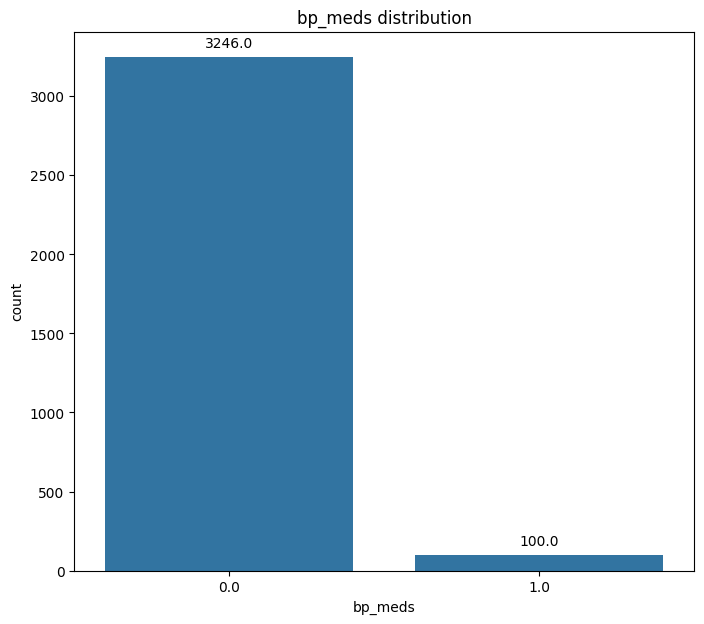

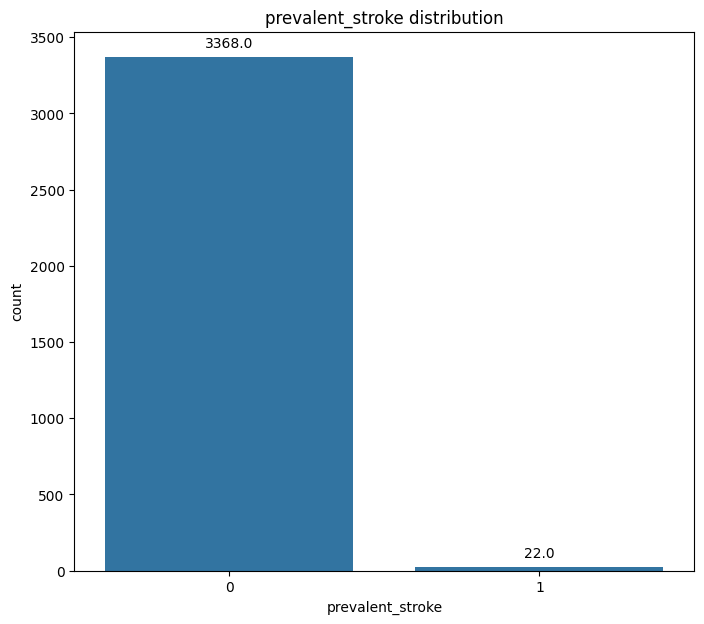

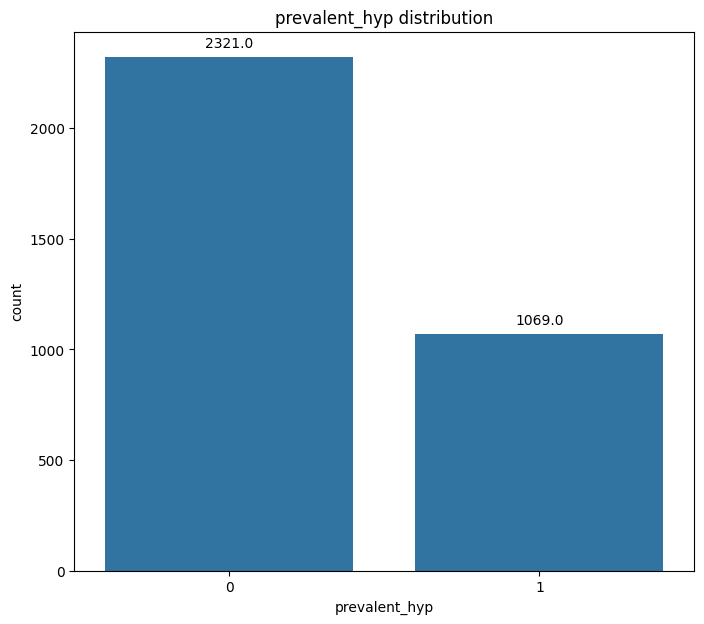

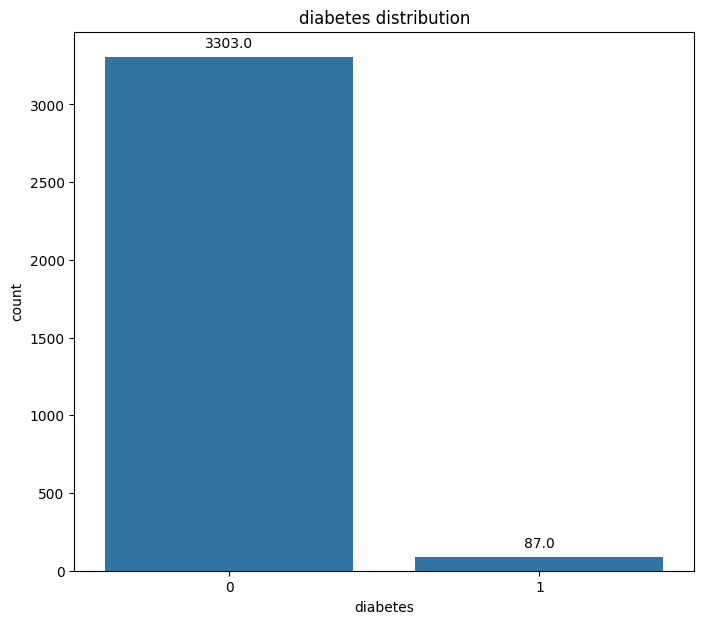

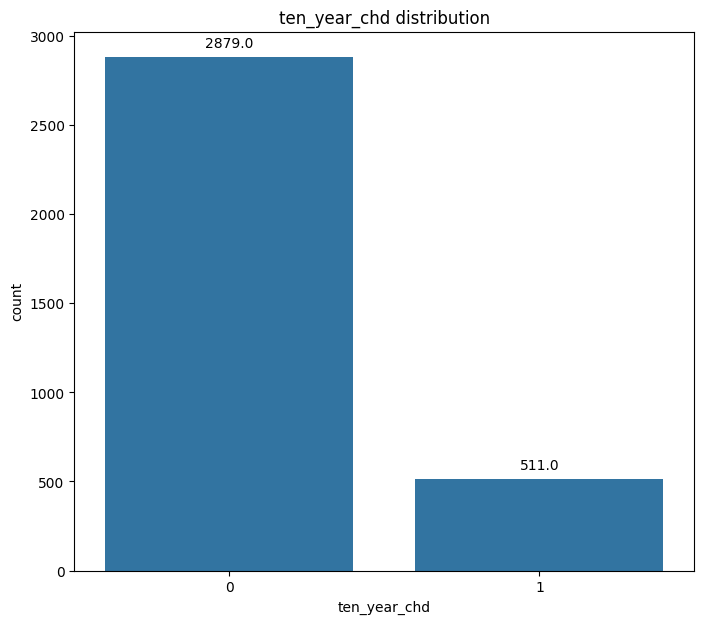

In [ ]:
# Chart - 5 visualization code

# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(8,7))
  p = sns.countplot(x=i, data = dataset)
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

The distribution of different categories in the categorical columns can be seen. The education column has the highest for the 1 category followed by 2 3 and 4.

The gender distribution is not even with high count for females. The 'is_smoking' column is even. Bp_meds, prevalent_stroke, prevalent_hyp and diabetes are imbalanced, they have very few counts for the positive cases.

Finally the ten_year_chd is also imbalanced with few positive cases compared to the negative cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the gender distribution or design educational programs based on the education levels of the target audience. Additionally, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

However, it is important to note that the chart alone does not provide a complete picture of the business impact. The actual impact would depend on how well these insights are utilized in business strategies and actions. Factors such as market demand, competition, and the effectiveness of the implemented strategies would also play a role in determining the overall business growth. Therefore, while the gained insights have the potential to create positive business impact, their actual realization would require further analysis and strategic implementation.

#### Chart - 6

<Figure size 1000x500 with 0 Axes>

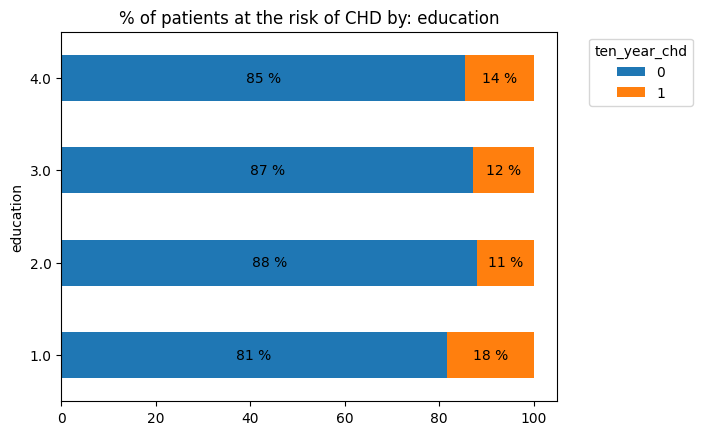

<Figure size 1000x500 with 0 Axes>

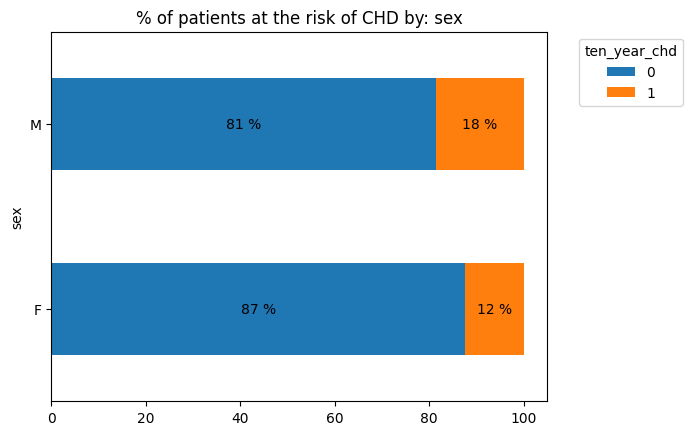

<Figure size 1000x500 with 0 Axes>

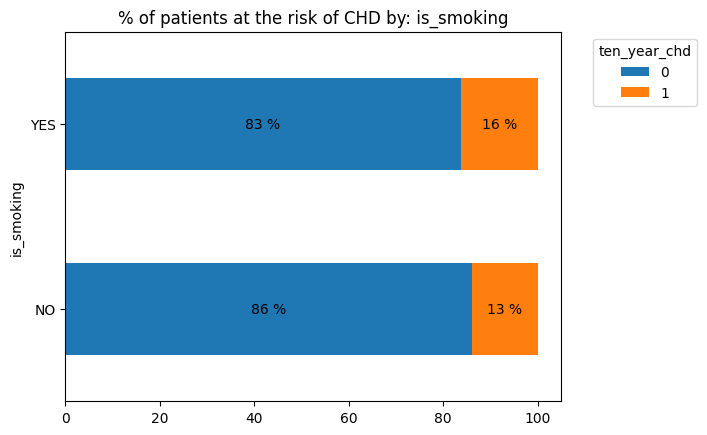

<Figure size 1000x500 with 0 Axes>

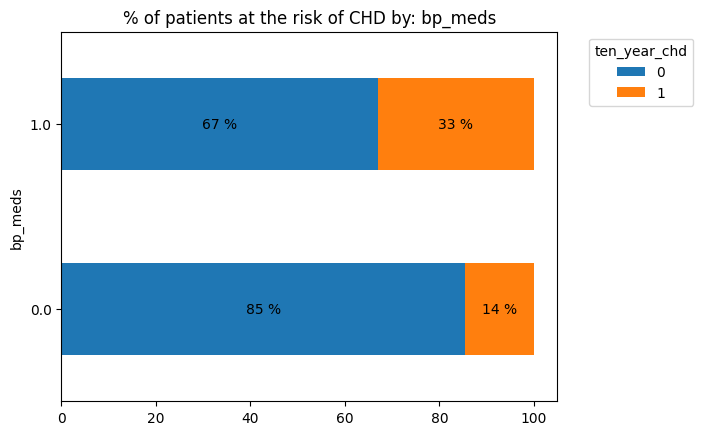

<Figure size 1000x500 with 0 Axes>

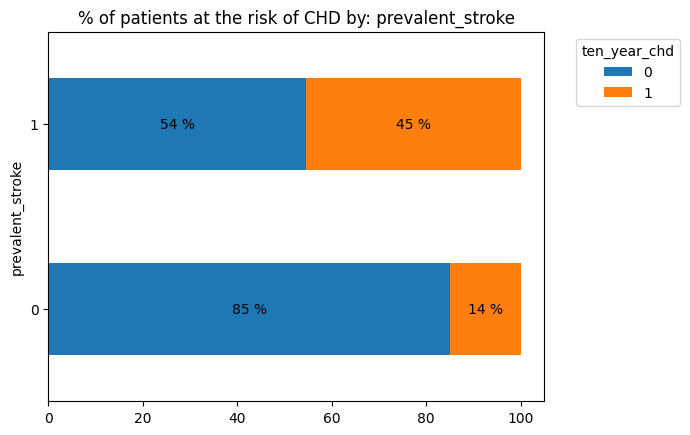

<Figure size 1000x500 with 0 Axes>

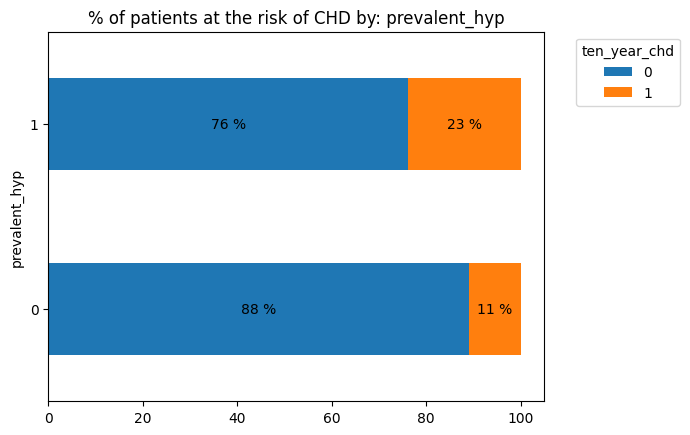

<Figure size 1000x500 with 0 Axes>

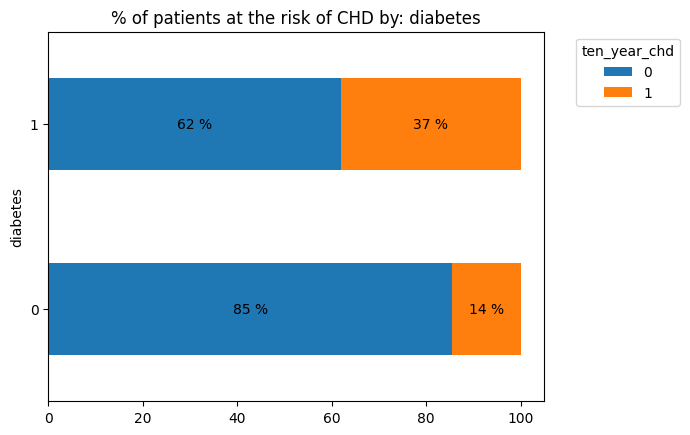

In [ ]:
# Chart - 6 visualization code

# 100% stacked bar chart

for i in categorical_var[:-1]:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = dataset.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

##### 1. Why did you pick the specific chart?

A 100% horizontal stacked bar chart is a type of data visualization that represents the composition or proportion of multiple categories within a whole. Some features of the stacked horizontal bar chart include:

Comparison of proportions: The chart displays multiple categories or groups stacked horizontally, allowing for easy visual comparison of their relative proportions within the total. Each bar represents the whole, and the segments of the bar represent the different categories or components.

Percentage representation: The stacked horizontal bar chart represents the categories as percentages of the whole. This allows for a clear understanding of the relative contributions of each category to the total.

Distribution across categories: The chart provides insights into the distribution and composition of the data across different categories. It helps identify which categories contribute more or less to the overall composition.

Facilitating trend analysis: By comparing stacked horizontal bar charts over different time periods or groups, it is possible to observe trends and changes in the composition of categories. This can provide insights into shifts in proportions or the relative importance of different categories over time.

##### 2. What is/are the insight(s) found from the chart?

The percentage of CHD as per education does not provide much information as it is similar throughout the different education categories.

For sex we see that there is a slightly higher chance of CHD in male than in female.

For is_smoking again a very slightly high percentage of CHD is seen for the positive category of is_smoking.

For bp_meds and diabetes, we see high percentage of CHD for positive cases compared to the negative case.

Finally for the positive prevalent_stroke, the percentage is almost half indicating that the positive CHD is high for positive prevalent_stroke.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals the distribution and composition of different categories in relation to the occurrence of CHD. These insights can guide businesses in developing targeted strategies and interventions to address specific demographic groups or risk factors. For example, businesses can design preventive measures, educational campaigns, or tailored treatments to reduce the occurrence of CHD in high-risk categories. By leveraging these insights, businesses in the healthcare industry can improve patient outcomes, enhance customer satisfaction, and drive positive growth.

There are no specific insights from the chart that directly lead to negative growth. However, it's important to consider the overall prevalence of CHD and the effectiveness of interventions. If the prevalence of CHD remains high across all categories and the implemented strategies fail to yield desired outcomes, it could potentially result in negative growth due to increased healthcare costs, decreased patient satisfaction, or reputational issues. Therefore, the business impact ultimately depends on the successful implementation of strategies based on the insights gained from the chart

#### Chart - 7

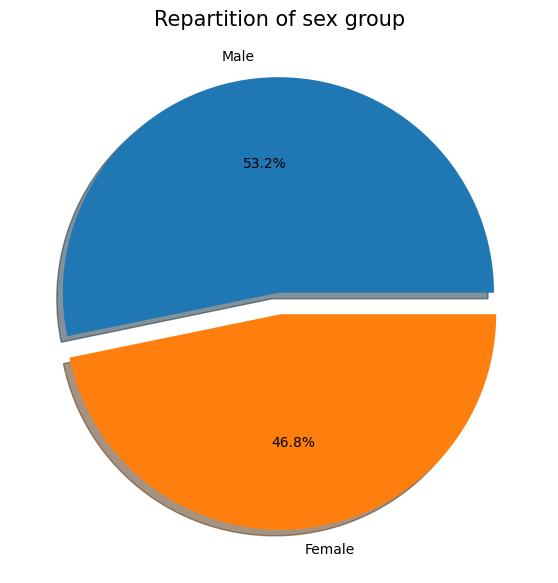

In [ ]:
# Chart - 7 visualization code

Male=dataset[dataset["sex"]=='M'].sum()
Female=dataset[dataset["sex"]=='F'].sum()

# Set labels
Sex_grp={"Male":Male["ten_year_chd"],"Female":Female["ten_year_chd"]}
plt.gcf().set_size_inches(7,7)
plt.pie(Sex_grp.values(),labels=Sex_grp.keys(), explode=[0.05, 0.05], autopct ='%1.1f%%', shadow = True);
plt.title("Repartition of sex group", fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that the gender distribution is not even with high count for females. 53.2% ratio are there for males and 46.8% ratio for females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the gender distribution of the target audience.

#### Chart - 8

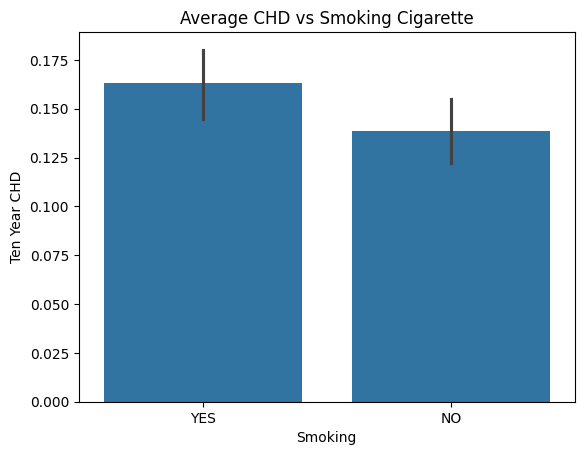

In [ ]:
# Chart - 8 visualization code

# Plot for Ten year CHD for smoking cigarette
sns.barplot(x='is_smoking',y='ten_year_chd',data=dataset)
plt.ylabel("Ten Year CHD")
plt.xlabel("Smoking")
plt.title('Average CHD vs Smoking Cigarette')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

To show the distribution of the CHD data with smoking cigarette i used bar chart.

##### 2. What is/are the insight(s) found from the chart?

There is low chances of CHD for non smokers compare to smoking persons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, because analysing the high chances of CHD on the basis of smoking cigarette we got to know that for which type peoples the CHD value is high or low, so we can focus more on that portion.

#### Chart - 9

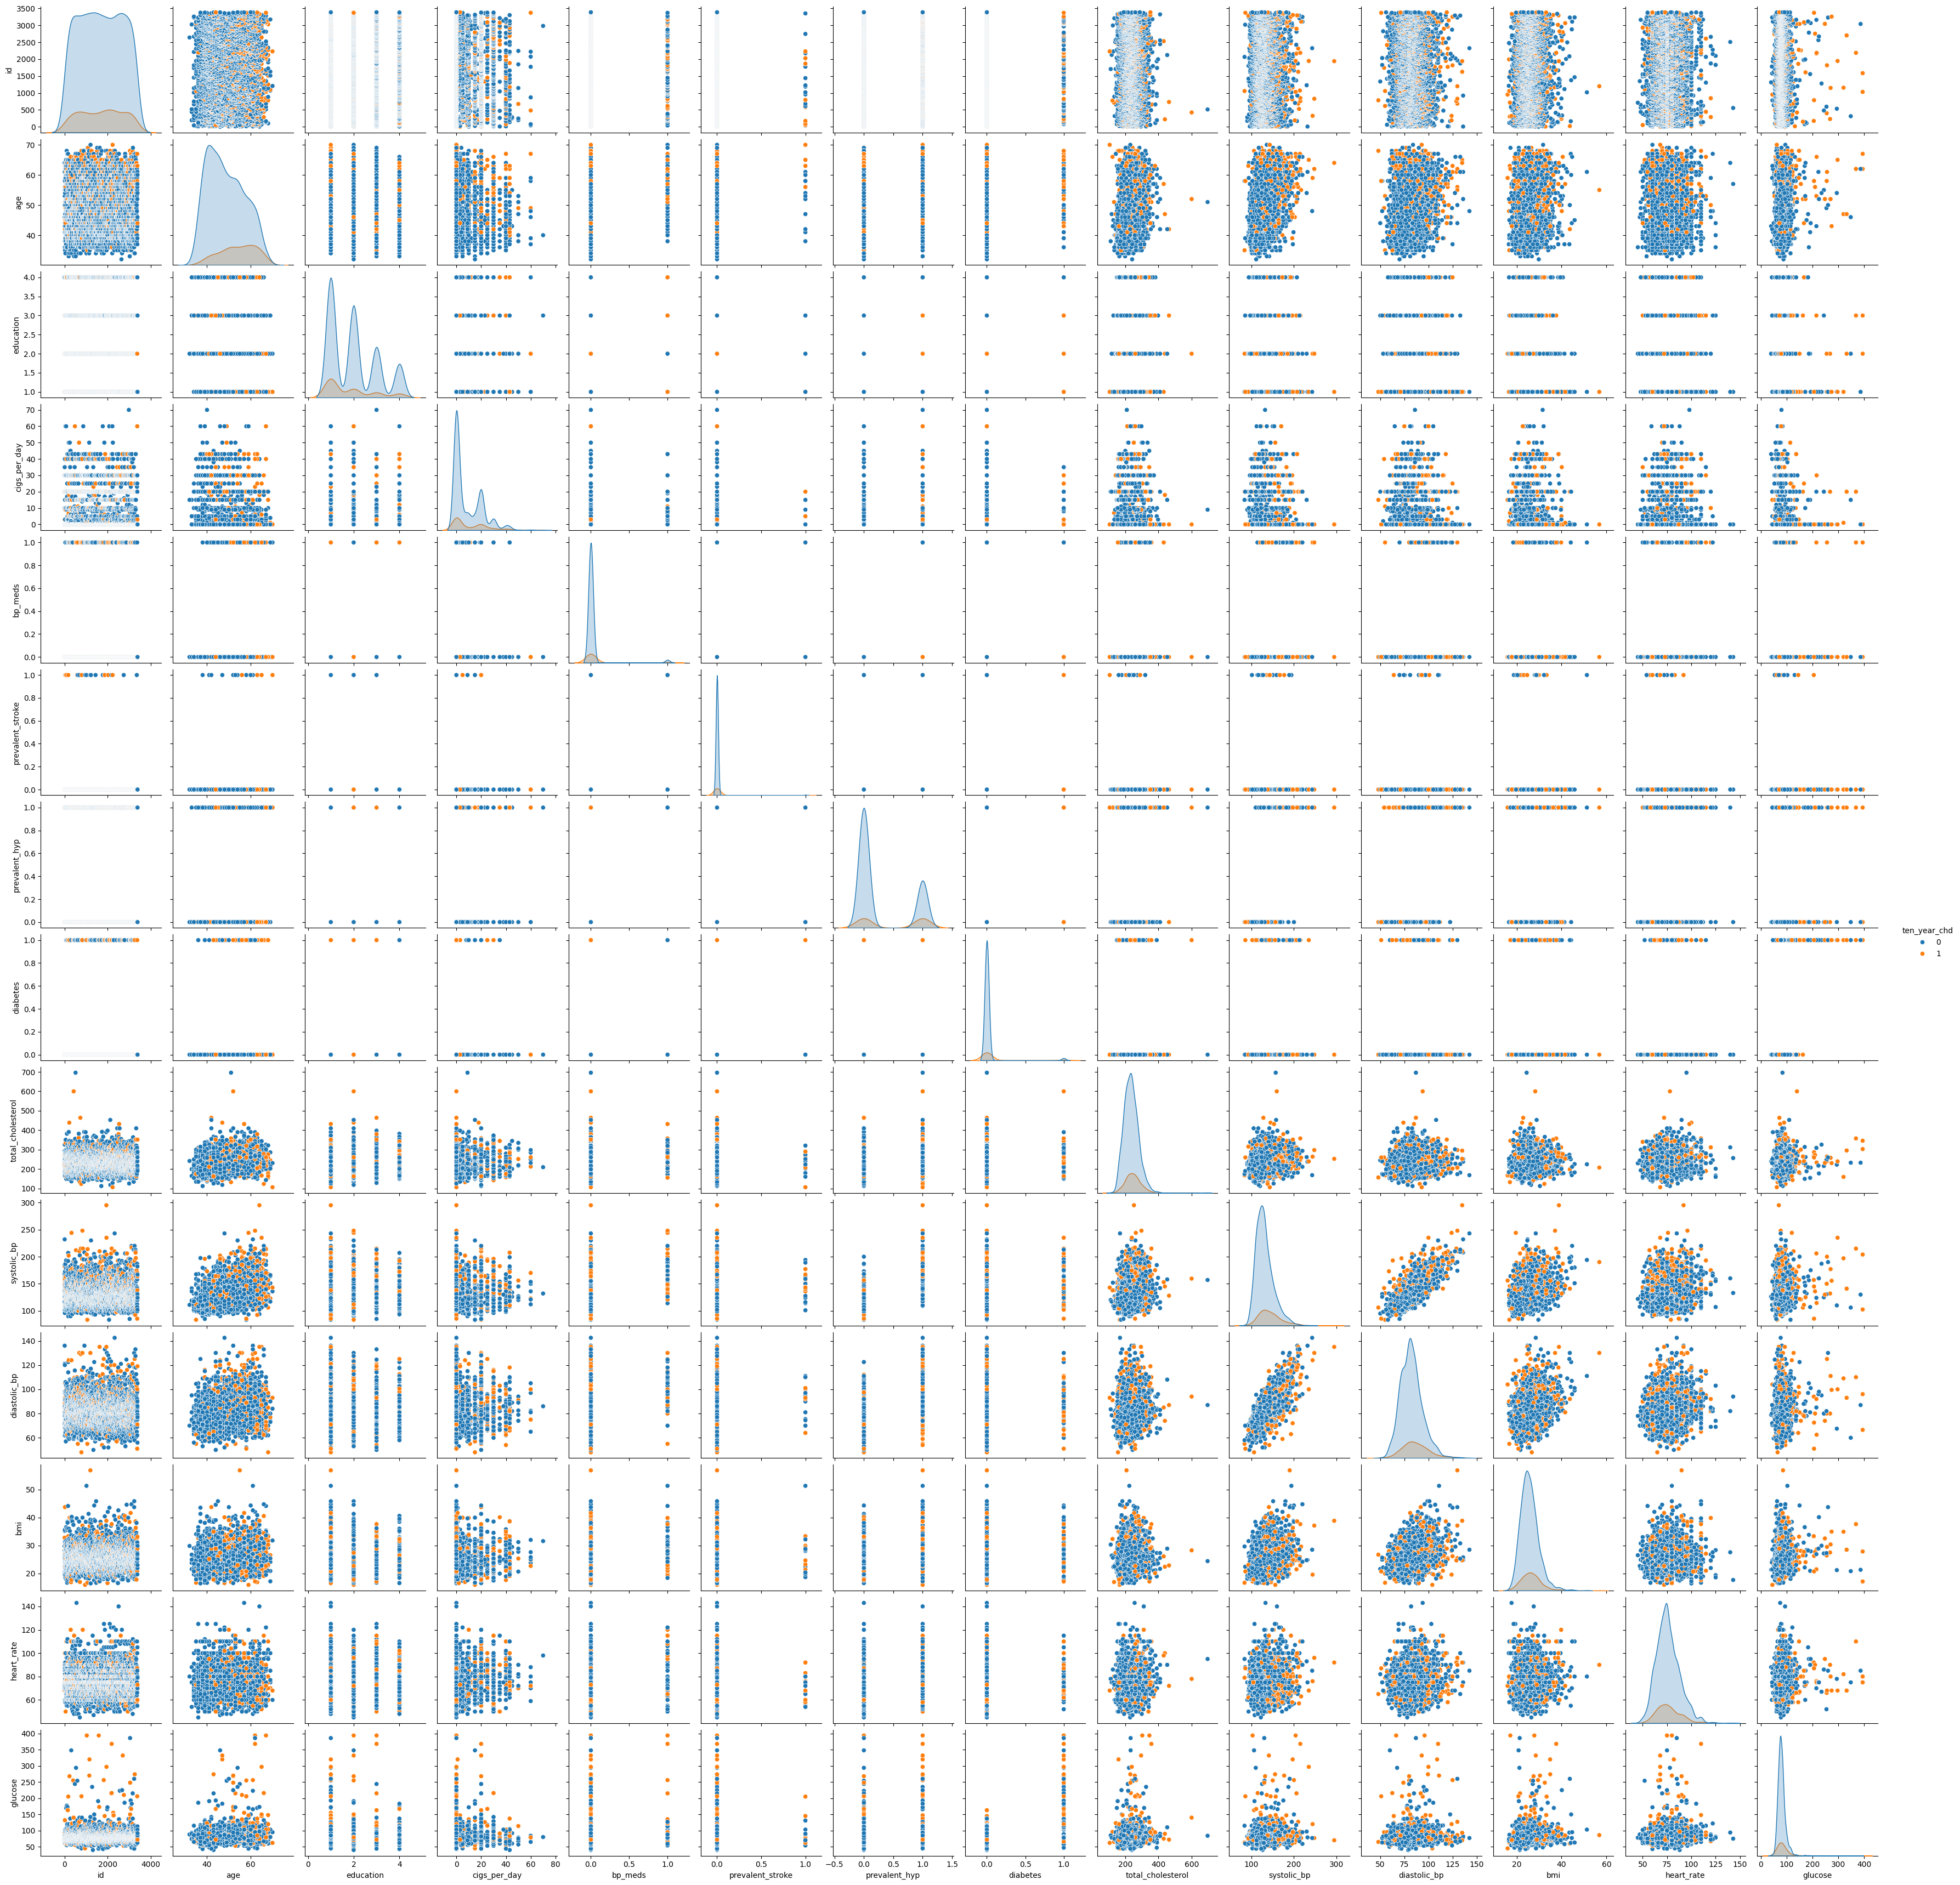

In [ ]:
# Chart - 9 visualization code

# Pair Plot visualization code
sns.pairplot(dataset, hue="ten_year_chd")
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

We see that the cigs_per_day data distribution is highly skewed and it contains high 0 value so we can convert this into categorical column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Personalized health interventions or premium adjustments for different smoking categories can lead to better customer engagement and retention.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:** There is no association between education level and CHD outcome.

**Alternate hypothesis:** There is an association between education level and CHD outcome.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(dataset['education'], dataset['ten_year_chd'])
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print p-value
print(f'p-value: {p}')

ten_year_chd     0    1
education              
1.0           1135  256
2.0            872  118
3.0            479   70
4.0            319   54
p-value: 6.038646749234552e-05


The p value is significantly lower than 0.05 so we reject the null hypothesis.

##### Which statistical test have you done to obtain P-Value?

To evaluate whether the 'education' variable influences the occurrence of chronic heart disease (CHD), I conducted a chi-squared test of independence. This test helped assess if there is a meaningful correlation between education levels and CHD outcomes. By analyzing the chi-squared value and the corresponding p-value, I could draw conclusions about the potential association between these two factors within the dataset.

##### Why did you choose the specific statistical test?

I opted to perform the chi-squared test of independence to examine the hypothesis that the ‘education’ column does not influence the occurrence of chronic heart disease (CHD). This test is particularly suited for analyzing relationships between two categorical variables, making it an ideal choice for this case where both education level and CHD outcome are categorical.  

The chi-squared test operates by comparing the observed frequencies in a contingency table to the expected frequencies, which are calculated under the assumption that the null hypothesis is true. A significant difference between the observed and expected values indicates a potential association between the variables.  

In summary, I chose the chi-squared test of independence because it is a reliable and widely accepted method for exploring relationships between categorical variables. Using this test, I was able to draw meaningful conclusions about the potential link between education level and CHD outcomes in the dataset.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Education - Bp-meds (mode)

In [ ]:
# Replacing the missing values in the categorical columns with its mode
dataset['education'] = dataset['education'].fillna(dataset['education'].mode()[0])
dataset['bp_meds'] = dataset['bp_meds'].fillna(dataset['bp_meds'].mode()[0])

Cigs_per_day

In [ ]:
# Mean and median number of cigarettes per day
dataset.cigs_per_day.mean().round(0),dataset.cigs_per_day.median()

(9.0, 0.0)

In [ ]:
# All missing values in the cigs_per_day column
dataset[dataset['cigs_per_day'].isna()]

id  age  education sex is_smoking  cigs_per_day  bp_meds  \
422    422   55        1.0   F        YES           NaN      0.0   
466    466   45        3.0   M        YES           NaN      0.0   
469    469   42        1.0   M        YES           NaN      0.0   
491    491   61        1.0   F        YES           NaN      0.0   
538    538   41        1.0   F        YES           NaN      0.0   
767    767   54        1.0   M        YES           NaN      0.0   
1461  1461   47        2.0   F        YES           NaN      0.0   
1467  1467   49        1.0   F        YES           NaN      0.0   
1597  1597   57        1.0   F        YES           NaN      0.0   
1986  1986   49        2.0   F        YES           NaN      0.0   
2031  2031   58        4.0   F        YES           NaN      0.0   
2087  2087   49        4.0   M        YES           NaN      0.0   
2240  2240   47        3.0   F        YES           NaN      0.0   
2284  2284   45        2.0   M        YES           NaN      0.0   
2527  2527   58        2.0   M        YES           NaN      0.0   
2638  2638   57        1.0   M        YES           NaN      0.0   
2648  2648   39        2.0   M        YES           NaN      0.0   
2723  2723   43        4.0   M        YES           NaN      0.0   
2879  2879   42        1.0   M        YES           NaN      0.0   
2945  2945   53        2.0   M        YES           NaN      0.0   
3301  3301   55        1.0   M        YES           NaN      0.0   
3378  3378   39        3.0   F        YES           NaN      0.0   

      prevalent_stroke  prevalent_hyp  diabetes  total_cholesterol  \
422                  0              1         0              213.0   
466                  0              1         0              170.0   
469                  0              0         0              196.0   
491                  0              1         0              356.0   
538                  0              0         0              171.0   
767                  0              0         0              219.0   
1461                 0              0         0              365.0   
1467                 0              0         0              252.0   
1597                 0              0         0              229.0   
1986                 0              1         0              233.0   
2031                 0              1         0              270.0   
2087                 0              0         0              256.0   
2240                 0              0         0              321.0   
2284                 0              0         0              248.0   
2527                 0              0         0              235.0   
2638                 0              0         0              223.0   
2648                 0              0         0              285.0   
2723                 0              0         0              222.0   
2879                 0              0         0              226.0   
2945                 0              0         0              276.0   
3301                 0              0         0              214.0   
3378                 0              0         0              197.0   

      systolic_bp  diastolic_bp    bmi  heart_rate  glucose  ten_year_chd  
422         163.0          91.0  28.66        69.0     66.0             0  
466         145.5          99.0  26.74        83.0     85.0             0  
469         123.0          73.0  22.06        66.0      NaN             0  
491         168.0          98.0  27.30       103.0    106.0             0  
538         135.0          82.5  24.35        79.0     82.0             0  
767         110.0          72.0  26.05        95.0     86.0             0  
1461        127.0          76.0  24.44        72.0     80.0             0  
1467        123.0          69.0  21.45        72.0     89.0             0  
1597        115.0          69.0  24.43        80.0     93.0             0  
1986        158.0         102.0  25.31        90.0     72.0             

#### Education - Bp-meds (mode)

In [ ]:
# Replacing the missing values in the categorical columns with its mode
dataset['education'] = dataset['education'].fillna(dataset['education'].mode()[0])
dataset['bp_meds'] = dataset['bp_meds'].fillna(dataset['bp_meds'].mode()[0])

#### Cigs_per_day

In [ ]:
# Mean and median number of cigarettes per day
dataset.cigs_per_day.mean().round(0),dataset.cigs_per_day.median()

(9.0, 0.0)

In [ ]:
# All missing values in the cigs_per_day column
dataset[dataset['cigs_per_day'].isna()]

id  age  education sex is_smoking  cigs_per_day  bp_meds  \
422    422   55        1.0   F        YES           NaN      0.0   
466    466   45        3.0   M        YES           NaN      0.0   
469    469   42        1.0   M        YES           NaN      0.0   
491    491   61        1.0   F        YES           NaN      0.0   
538    538   41        1.0   F        YES           NaN      0.0   
767    767   54        1.0   M        YES           NaN      0.0   
1461  1461   47        2.0   F        YES           NaN      0.0   
1467  1467   49        1.0   F        YES           NaN      0.0   
1597  1597   57        1.0   F        YES           NaN      0.0   
1986  1986   49        2.0   F        YES           NaN      0.0   
2031  2031   58        4.0   F        YES           NaN      0.0   
2087  2087   49        4.0   M        YES           NaN      0.0   
2240  2240   47        3.0   F        YES           NaN      0.0   
2284  2284   45        2.0   M        YES           NaN      0.0   
2527  2527   58        2.0   M        YES           NaN      0.0   
2638  2638   57        1.0   M        YES           NaN      0.0   
2648  2648   39        2.0   M        YES           NaN      0.0   
2723  2723   43        4.0   M        YES           NaN      0.0   
2879  2879   42        1.0   M        YES           NaN      0.0   
2945  2945   53        2.0   M        YES           NaN      0.0   
3301  3301   55        1.0   M        YES           NaN      0.0   
3378  3378   39        3.0   F        YES           NaN      0.0   

      prevalent_stroke  prevalent_hyp  diabetes  total_cholesterol  \
422                  0              1         0              213.0   
466                  0              1         0              170.0   
469                  0              0         0              196.0   
491                  0              1         0              356.0   
538                  0              0         0              171.0   
767                  0              0         0              219.0   
1461                 0              0         0              365.0   
1467                 0              0         0              252.0   
1597                 0              0         0              229.0   
1986                 0              1         0              233.0   
2031                 0              1         0              270.0   
2087                 0              0         0              256.0   
2240                 0              0         0              321.0   
2284                 0              0         0              248.0   
2527                 0              0         0              235.0   
2638                 0              0         0              223.0   
2648                 0              0         0              285.0   
2723                 0              0         0              222.0   
2879                 0              0         0              226.0   
2945                 0              0         0              276.0   
3301                 0              0         0              214.0   
3378                 0              0         0              197.0   

      systolic_bp  diastolic_bp    bmi  heart_rate  glucose  ten_year_chd  
422         163.0          91.0  28.66        69.0     66.0             0  
466         145.5          99.0  26.74        83.0     85.0             0  
469         123.0          73.0  22.06        66.0      NaN             0  
491         168.0          98.0  27.30       103.0    106.0             0  
538         135.0          82.5  24.35        79.0     82.0             0  
767         110.0          72.0  26.05        95.0     86.0             0  
1461        127.0          76.0  24.44        72.0     80.0             0  
1467        123.0          69.0  21.45        72.0     89.0             0  
1597        115.0          69.0  24.43        80.0     93.0             0  
1986        158.0         102.0  25.31        90.0     72.0             

It is observed that the missing value of the cigs per day for all entry has the 'is smoking' column as YES that is they smoke.

In [ ]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
dataset[dataset['is_smoking']=='YES']['cigs_per_day'].mean(),dataset[dataset['is_smoking']=='YES']['cigs_per_day'].median()

(18.345945945945946, 20.0)

In [ ]:
# Imputing the missing values in the cigs_per_day
dataset['cigs_per_day'] = dataset['cigs_per_day'].fillna(dataset[dataset['is_smoking']=='YES']['cigs_per_day'].median())

In [ ]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

dataset[(dataset['is_smoking']=='NO') & (dataset['cigs_per_day']>0)]

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

In [ ]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

dataset[(dataset['is_smoking']=='YES') & (dataset['cigs_per_day']==0)]

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

It is observed that there are no incorrect entry.

#### Cholesterol - BMI - Heartrate

In [ ]:
# Mean and median for total_cholesterol
dataset.total_cholesterol.mean(),dataset.total_cholesterol.median()

(237.07428400954655, 234.0)

In [ ]:
# Mean and median for bmi
dataset.bmi.mean(),dataset.bmi.median()

(25.7949644549763, 25.38)

In [ ]:
# Mean and median for heart_rate
dataset.heart_rate.mean(),dataset.heart_rate.median()

(75.97727943346119, 75.0)

In [ ]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
dataset['total_cholesterol'] = dataset['total_cholesterol'].fillna(dataset['total_cholesterol'].median())
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].median())
dataset['heart_rate'] = dataset['heart_rate'].fillna(dataset['heart_rate'].median())

In [ ]:
# mean and median of total_cholesterol after median imputation
dataset.total_cholesterol.mean(),dataset.total_cholesterol.median()

(237.03982300884957, 234.0)

In [ ]:
# mean and median of bmi after median imputation
dataset.bmi.mean(),dataset.bmi.median()

(25.793250737463126, 25.38)

In [ ]:
# mean and median of heart_rate after median imputation
dataset.heart_rate.mean(),dataset.heart_rate.median()

(75.97699115044247, 75.0)

#### Glucose

In [ ]:
# total missing values in glucose
dataset.glucose.isna().sum()

304

In [ ]:
# Mean, median, and mode for glucose
dataset.glucose.mean(),dataset.glucose.median(),dataset.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

- The spread of the data is skewed to the positive side, with values that fall outside the typical range.

- In the glucose column, 304 data points are missing. Using the mean or median to fill in these values could introduce significant inaccuracies.

- To counteract this, the KNN imputer method could be employed to replace the missing data.

- In a time series dataset, the missing values could be estimated through interpolation, which is a method of estimating missing data points.

In [ ]:
dataset

id  age  education sex is_smoking  cigs_per_day  bp_meds  \
0        0   64        2.0   F        YES           3.0      0.0   
1        1   36        4.0   M         NO           0.0      0.0   
2        2   46        1.0   F        YES          10.0      0.0   
3        3   50        1.0   M        YES          20.0      0.0   
4        4   64        1.0   F        YES          30.0      0.0   
...    ...  ...        ...  ..        ...           ...      ...   
3385  3385   60        1.0   F         NO           0.0      0.0   
3386  3386   46        1.0   F         NO           0.0      0.0   
3387  3387   44        3.0   M        YES           3.0      0.0   
3388  3388   60        1.0   M         NO           0.0      0.0   
3389  3389   54        3.0   F         NO           0.0      0.0   

      prevalent_stroke  prevalent_hyp  diabetes  total_cholesterol  \
0                    0              0         0              221.0   
1                    0              1         0              212.0   
2                    0              0         0              250.0   
3                    0              1         0              233.0   
4                    0              0         0              241.0   
...                ...            ...       ...                ...   
3385                 0              0         0              261.0   
3386                 0              0         0              199.0   
3387                 0              1         0              352.0   
3388                 0              1         0              191.0   
3389                 0              0         0              288.0   

      systolic_bp  diastolic_bp    bmi  heart_rate  glucose  ten_year_chd  
0           148.0          85.0  25.38        90.0     80.0             1  
1           168.0          98.0  29.77        72.0     75.0             0  
2           116.0          71.0  20.35        88.0     94.0             0  
3           158.0          88.0  28.26        68.0     94.0             1  
4           136.5          85.0  26.42        70.0     77.0             0  
...           ...           ...    ...         ...      ...           ...  
3385        123.5          79.0  29.28        70.0    103.0             0  
3386        102.0          56.0  21.96        80.0     84.0             0  
3387        164.0         119.0  28.92        73.0     72.0             1  
3388        167.0         105.0  23.01        80.0     85.0             0  
3389        124.0          77.0  29.88        79.0     92.0             0  

[3390 rows x 17 columns]

In [ ]:
# Replacing the string values of the binary column with 0 and 1

dataset['sex'] = np.where(dataset['sex'] == 'M',1,0)
dataset['is_smoking'] = np.where(dataset['is_smoking'] == 'YES',1,0)

In [ ]:
# changing datatypes
dataset= dataset.astype({'age': int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [ ]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(dataset)
dataset = pd.DataFrame(imputed, columns=dataset.columns)

In [ ]:
# mean, median, and mode for glucose after knn imputation
dataset.glucose.mean(),dataset.glucose.median(),dataset.glucose.mode()

(82.07203539823007,
 78.05,
 0    75.0
 Name: glucose, dtype: float64)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3390 non-null   float64
 1   age                3390 non-null   float64
 2   education          3390 non-null   float64
 3   sex                3390 non-null   float64
 4   is_smoking         3390 non-null   float64
 5   cigs_per_day       3390 non-null   float64
 6   bp_meds            3390 non-null   float64
 7   prevalent_stroke   3390 non-null   float64
 8   prevalent_hyp      3390 non-null   float64
 9   diabetes           3390 non-null   float64
 10  total_cholesterol  3390 non-null   float64
 11  systolic_bp        3390 non-null   float64
 12  diastolic_bp       3390 non-null   float64
 13  bmi                3390 non-null   float64
 14  heart_rate         3390 non-null   float64
 15  glucose            3390 non-null   float64
 16  ten_year_chd       3390 

In [ ]:
# checking for missing values
dataset.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used median, mode and KNN imputation techniques to handle missing values in the dataset. I choose to use these techniques because they are appropriate for the nature of the data and the specific problem at hand. For example, I used median imputation for numerical variables that were skewed, as it is a robust measure of central tendency that is not affected by outliers.

I used mode imputation for categorical variables, as it is the most common value and can be a good estimate for missing values.

I also used KNN imputation, which works by finding similar observations in the dataset and using their values to impute missing values. This technique can be useful when there are patterns or relationships in the data that can be leveraged to make more accurate imputations.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

continuous_var

['id',
 'age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [ ]:
# Handling Outliers & Outlier treatments
# Removing Outliers
for col in continuous_var:
  # Using IQR method to define the range of inliners:
  q1, q3, median = dataset[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
dataset[col] = np.where(dataset[col] > upper_limit, upper_limit,np.where(
                        dataset[col] < lower_limit,lower_limit,dataset[col]))

##### What all outlier treatment techniques have you used and why did you use those techniques?

I applied the Interquartile Range (IQR) method to detect and eliminate outliers in the continuous columns of the dataset. This approach was selected because it is a robust and reliable technique for handling outliers, as it remains unaffected by extreme values.  

The IQR is determined by calculating the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Values that fall below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR are flagged as outliers.  

This method allowed me to systematically and objectively identify and remove outliers, ensuring the integrity of the dataset and minimizing the influence of extreme values on the analysis.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

dataset = pd.get_dummies(dataset, columns=['education'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Onehot encoding is used to encode the education column.

All the remaining categorical columns are binary (0/1) so no need to encode them.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continuous_feature_df = pd.DataFrame(dataset[continuous_var])
continuous_feature_df

id   age  cigs_per_day  total_cholesterol  systolic_bp  \
0        0.0  64.0           3.0              221.0        148.0   
1        1.0  36.0           0.0              212.0        168.0   
2        2.0  46.0          10.0              250.0        116.0   
3        3.0  50.0          20.0              233.0        158.0   
4        4.0  64.0          30.0              241.0        136.5   
...      ...   ...           ...                ...          ...   
3385  3385.0  60.0           0.0              261.0        123.5   
3386  3386.0  46.0           0.0              199.0        102.0   
3387  3387.0  44.0           3.0              352.0        164.0   
3388  3388.0  60.0           0.0              191.0        167.0   
3389  3389.0  54.0           0.0              288.0        124.0   

      diastolic_bp    bmi  heart_rate  glucose  
0             85.0  25.38        90.0     80.0  
1             98.0  29.77        72.0     75.0  
2             71.0  20.35        88.0     94.0  
3             88.0  28.26        68.0     94.0  
4             85.0  26.42        70.0     77.0  
...            ...    ...         ...      ...  
3385          79.0  29.28        70.0    103.0  
3386          56.0  21.96        80.0     84.0  
3387         119.0  28.92        73.0     72.0  
3388         105.0  23.01        80.0     85.0  
3389          77.0  29.88        79.0     92.0  

[3390 rows x 9 columns]

In [ ]:
calc_vif(dataset[[i for i in continuous_feature_df]])

variables         VIF
0                 id    3.960926
1                age   41.636905
2       cigs_per_day    1.629012
3  total_cholesterol   30.187977
4        systolic_bp  108.667550
5       diastolic_bp  124.592160
6                bmi   44.447081
7         heart_rate   38.123170
8            glucose   38.569804

In [ ]:
# Creating a new column pulse_pressure and drop systolic_bp and diastolic_bp

dataset['pulse_pressure'] = dataset['systolic_bp']-dataset['diastolic_bp']
dataset.drop('systolic_bp',axis=1,inplace=True)
dataset.drop('diastolic_bp',axis=1,inplace=True)

In [ ]:
# Columns
dataset.columns

Index(['id', 'age', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'pulse_pressure'],
      dtype='object')

In [ ]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

In [ ]:
continuous_feature_df = pd.DataFrame(dataset[continuous_var])

In [ ]:
calc_vif(dataset[[i for i in continuous_feature_df]])

variables        VIF
0                 id   3.960710
1                age  40.649122
2       cigs_per_day   1.626683
3  total_cholesterol  29.744989
4                bmi  35.921934
5         heart_rate  35.476844
6            glucose  38.177523
7     pulse_pressure  15.389251

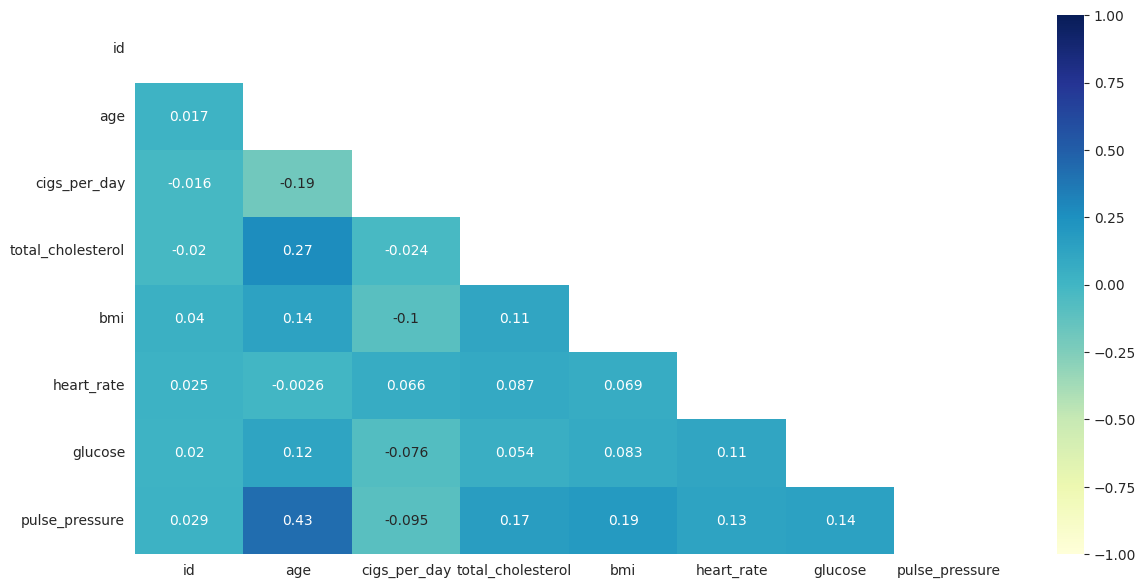

In [ ]:
corr = dataset[continuous_var].corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Dropping is_smoking
dataset.drop('is_smoking',axis=1,inplace=True)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [ ]:
# Updated columns
dataset.columns

Index(['id', 'age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke',
       'prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd', 'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0', 'pulse_pressure'],
      dtype='object')

##### What all feature selection methods have you used  and why?

I employed the Variance Inflation Factor (VIF) technique to address multicollinearity in the dataset. Upon analyzing the VIF values, I observed that both systolic and diastolic blood pressure had high VIF scores, indicating strong multicollinearity between them. To resolve this issue, I created a new feature, **pulse pressure**, which is calculated as the difference between systolic and diastolic blood pressure, effectively reducing redundancy in the dataset.

Additionally, I noticed that the **is_smoking** column contained binary values ("Yes" or "No"), which aligned with the **cigs_per_day** column. In the latter, non-smokers had a value of 0, while smokers had the number of cigarettes smoked per day. This redundancy was addressed, and both columns provide complementary insights into smoking behavior.

##### Which all features you found important and why?

The key columns that play a significant role in the analysis are **'age'**, **'sex'**, **'cigs_per_day'**, **'bp_meds'**, **'prevalent_stroke'**, **'prevalent_hyp'**, **'diabetes'**, **'total_cholesterol'**, **'bmi'**, **'heart_rate'**, **'glucose'**, **'ten_year_chd'**, **'education_1.0'**, **'education_2.0'**, **'education_3.0'**, **'education_4.0'**, and **'pulse_pressure'**.  

These columns represent various aspects of the patient's health and lifestyle, which include:

- **Demographic data**: *'age'*, *'sex'*, and the education levels encoded as *'education_1.0'*, *'education_2.0'*, *'education_3.0'*, and *'education_4.0'*.  
- **Behavioral data**: *'cigs_per_day'*, representing smoking habits, and *'bp_meds'*, indicating whether the patient takes blood pressure medication.  
- **Current medical data**: *'total_cholesterol'*, *'bmi'*, *'heart_rate'*, *'glucose'*, and the derived *'pulse_pressure'*, which combines systolic and diastolic blood pressure for a more precise analysis of cardiovascular health.  
- **Historic medical data**: *'prevalent_stroke'*, *'prevalent_hyp'*, and *'diabetes'*, which indicate any previous occurrences of stroke, hypertension, or diabetes, and the target variable *'ten_year_chd'*, representing the risk of coronary heart disease within ten years.  

These columns provide a comprehensive picture of both the medical history and lifestyle factors that are crucial in predicting heart disease risk and other health outcomes.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Skewness along the index axis
(dataset[continuous_var]).skew(axis = 0)

id                   0.000000
age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
glucose              0.470306
pulse_pressure       1.412382
dtype: float64

In [ ]:
# Skew for sqrt transformation
np.sqrt(dataset[continuous_var]).skew(axis = 0)

id                  -0.567131
age                  0.103528
cigs_per_day         0.459793
total_cholesterol    0.410514
bmi                  0.663534
heart_rate           0.411092
glucose              0.272635
pulse_pressure       0.840977
dtype: float64

In [ ]:
# Skew for log10 transformation
np.log10(dataset[continuous_var]+1).skew(axis = 0)

id                  -1.929944
age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              0.070849
pulse_pressure       0.354174
dtype: float64

In [ ]:
# Implementing log transformation & sqrt transformation on continuous variables

dataset['age']  = np.log10(dataset['age']+1)
dataset['cigs_per_day']  = np.sqrt(dataset['cigs_per_day'])
dataset['total_cholesterol']  = np.log10(dataset['total_cholesterol']+1)
dataset['bmi'] = np.sqrt(dataset['bmi'])
dataset['heart_rate'] = np.log10(dataset['heart_rate']+1)
dataset['glucose'] = np.sqrt(dataset['glucose'])
dataset['pulse_pressure'] = np.sqrt(dataset['pulse_pressure'])

In [ ]:
# Checking skew after log transformation
dataset[continuous_var].skew(axis = 0)

id                   0.000000
age                 -0.015053
cigs_per_day         0.459793
total_cholesterol    0.011860
bmi                  0.663534
heart_rate           0.165898
glucose              0.272635
pulse_pressure       0.840977
dtype: float64

Yes the data need to be transformed as it was skewed.

I used log transform and squareroot transform on the different continuous columns to reduce the skew of the data.

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
features = [i for i in dataset.columns if i not in ['ten_year_chd']]

In [ ]:
features

['id',
 'age',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'education_1.0',
 'education_2.0',
 'education_3.0',
 'education_4.0',
 'pulse_pressure']

In [ ]:
continuous_var

['id',
 'age',
 'cigs_per_day',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [ ]:
dataset[continuous_var] = scaler.fit_transform(dataset[continuous_var])

In [ ]:
# defining the X and y
X = dataset.drop('ten_year_chd',axis=1)
y = dataset['ten_year_chd']

##### Which method have you used to scale you data and why?

Since the dataset contains independent features with varying scales, I applied the **StandardScaler** method to standardize the features and bring them to a common scale. This technique ensures that each feature has a mean of 0 and a standard deviation of 1, effectively normalizing the data.

By using **StandardScaler**, I transformed the data so that all independent variables (such as **age**, **cigs_per_day**, **total_cholesterol**, **bmi**, etc.) are on the same scale. This step is essential because some machine learning algorithms, particularly distance-based models like K-Means clustering, can be sensitive to the scale of the features. Standardizing the features ensures that no single feature dominates the model due to its larger scale and helps improve the performance of the algorithms.

In summary, scaling the independent features using **StandardScaler** allowed me to normalize the data, making it suitable for effective analysis and modeling.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction was not necessary in this case because I had already performed feature selection and retained only the most important variables for analysis. Through this process, I identified and kept the key features that significantly contribute to predicting the target variable, **'ten_year_chd'**.

By eliminating irrelevant or redundant features, I ensured that the dataset is streamlined and that the model focuses on the most relevant information. As a result, the remaining features are directly aligned with the problem at hand, allowing for more efficient modeling without the need for additional dimensionality reduction techniques.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

ten_year_chd
0.0    2303
1.0     409
Name: count, dtype: int64

##### What data splitting ratio have you used and why?

To train the model, I used the **train_test_split** method to divide the data into training and testing sets. Specifically, I allocated 80% of the data for training and 20% for testing. This split provides a well-balanced approach, ensuring that there is sufficient data to train the model effectively while retaining enough unseen data to evaluate its performance.  

By using 80% of the data for training, the model is exposed to a substantial amount of information, allowing it to learn the patterns and relationships in the data. The remaining 20% serves as a testing set, providing an unbiased evaluation of how well the model generalizes to new, unseen data. This split helps assess the model’s real-world applicability and ensures it performs well not only on the training data but also on new data that it hasn’t encountered before.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes.Since the dataset is imbalanced, with the number of positive cases being significantly lower than the negative cases, this could present a challenge when training the model. Imbalanced datasets can cause the model to be biased towards predicting the majority class (in this case, the negative cases), potentially leading to poor performance in identifying the minority class (the positive cases).

To address this, several techniques can be applied:

1. **Resampling Methods**: Techniques such as oversampling the minority class (positive cases) or undersampling the majority class (negative cases) can help balance the dataset.
   - **Oversampling**: This involves increasing the number of positive cases by duplicating them or generating synthetic examples (e.g., using SMOTE).
   - **Undersampling**: This involves reducing the number of negative cases, which can lead to the loss of valuable data.

2. **Class Weights**: Many machine learning models allow you to assign different weights to the classes. By giving more weight to the minority class, you can make the model pay more attention to the positive cases.

3. **Anomaly Detection Methods**: Since the positive cases are rare, treating the problem as an anomaly detection task rather than a standard classification problem can sometimes improve performance.

4. **Evaluation Metrics**: When working with imbalanced datasets, it's crucial to use evaluation metrics that go beyond accuracy. Metrics like **precision**, **recall**, **F1-score**, and the **Area Under the ROC Curve (AUC-ROC)** are more informative for assessing the model’s performance on imbalanced data.

By addressing the class imbalance appropriately, the model can be better trained to identify positive cases (such as those with chronic heart disease) and make more accurate predictions.

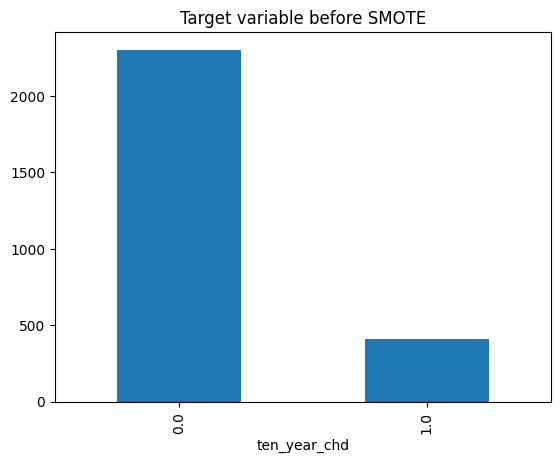

In [ ]:
# Handling Imbalanced Dataset (If needed)

# Visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')
plt.show()

In [ ]:
# Oversampling using SMOTETomek
# Fit predictor and target variable
X_smote, y_smote = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))

Samples in the original dataset:  2712
Samples in the resampled dataset:  4596


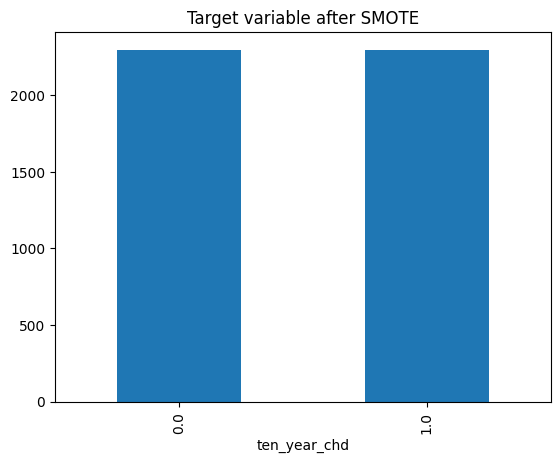

In [ ]:
# Visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used a combination of **SMOTE (Synthetic Minority Over-sampling Technique)** and **Tomek Links undersampling** to address the class imbalance in the dataset.

- **SMOTE** works by generating synthetic samples for the minority class. It selects instances from the minority class that are close to each other in the feature space, draws a line between them, and creates new instances along this line. This technique helps to balance the class distribution by enriching the minority class with more data, allowing the model to learn better patterns related to that class.

- **Tomek Links undersampling** is an undersampling technique that focuses on removing **Tomek links**—pairs of instances where one is from the minority class and the other from the majority class, and they are very close to each other in the feature space. By removing these pairs, the decision boundary between the classes is made clearer, and the model can focus on the more important and representative instances.

I chose this approach because it combines the strengths of both oversampling and undersampling:
1. **SMOTE** helps to avoid underfitting by generating more data for the minority class, making it easier for the model to detect patterns related to the minority class.
2. **Tomek Links** removes noisy or ambiguous data, improving the clarity of the decision boundary between the classes.

This combination of techniques allows me to balance the dataset effectively while also reducing potential noise, which can lead to better model performance, especially on imbalanced datasets.

## ***7. ML Model Implementation***

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(features):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=features)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh', colormap= 'Dark2')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1 : Logistic regression

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.7293298520452568
Test ROC AUC: 0.6386335784313726


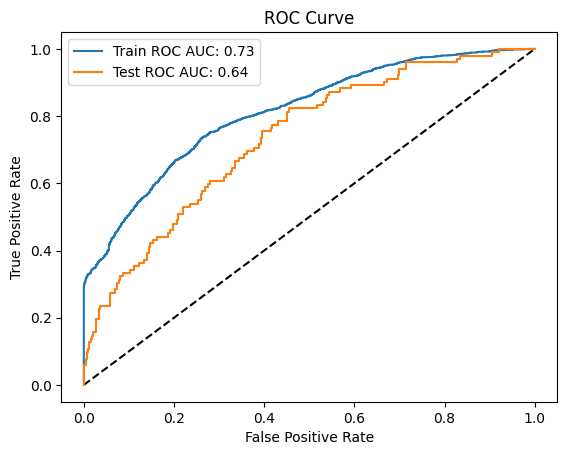


Confusion Matrix:


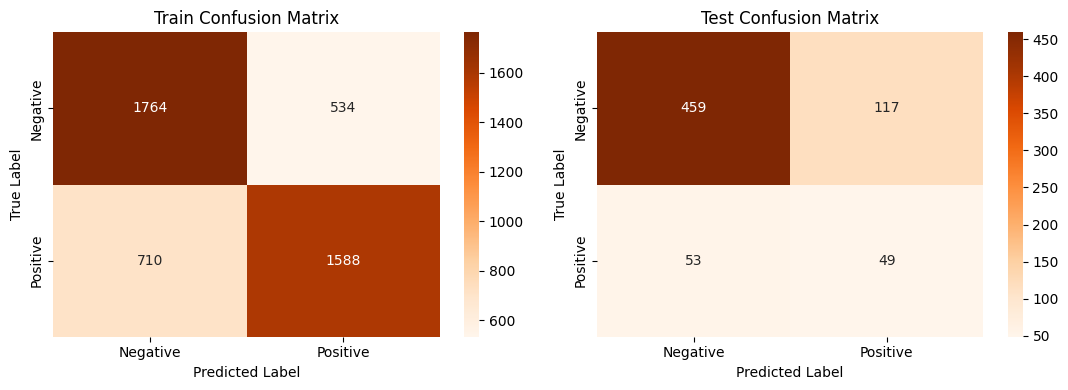


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.713015 | 0.767624 |   0.739313 | 2298       |
| 1.0          |    0.748351 | 0.691036 |   0.718552 | 2298       |
| accuracy     |    0.72933  | 0.72933  |   0.72933  |    0.72933 |
| macro avg    |    0.730683 | 0.72933  |   0.728932 | 4596       |
| weighted avg |    0.730683 | 0.72933  |   0.728932 | 4596       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.896484 | 0.796875 |   0.84375  | 576        |
| 1.0          |    0.295181 | 0.480392 |   0.365672 | 102        |
| accuracy     |    0.749263 | 0.749263 |   0.749263 |   0.749263 |
| macro avg    |    0.595833 | 0.638634 |   0.604711 | 678        |
| weighted avg |    0.806023 | 0.749263 |   0.771827 | 67

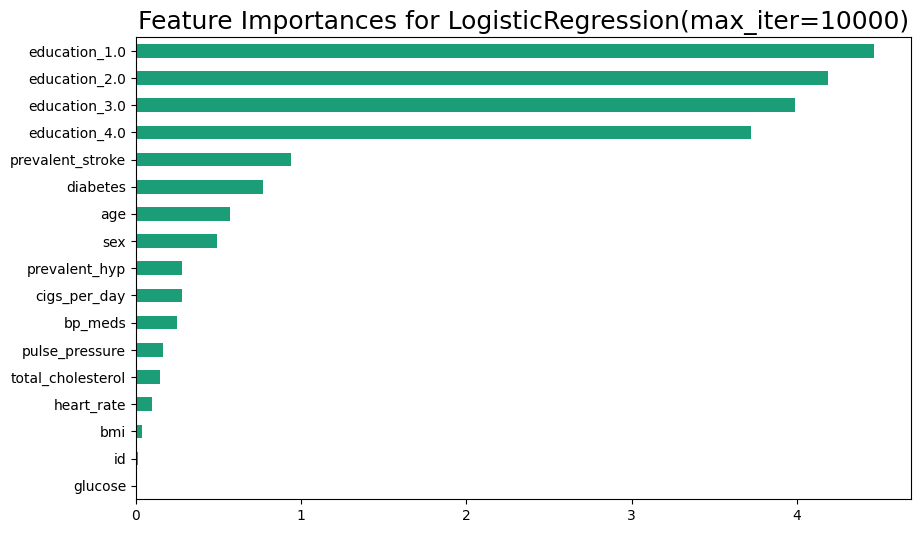

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_smote, X_test, y_smote, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

Logistic regression
Precision Train             0.730683
Precision Test              0.806023
Recall Train                0.729330
Recall Test                 0.749263
Accuracy Train              0.729330
Accuracy Test               0.749263
ROC-AUC Train               0.729330
ROC-AUC Test                0.638634
F1 macro Train              0.728932
F1 macro Test               0.771827

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_smote, y_smote)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.7332463011314185
Test ROC AUC: 0.661968954248366


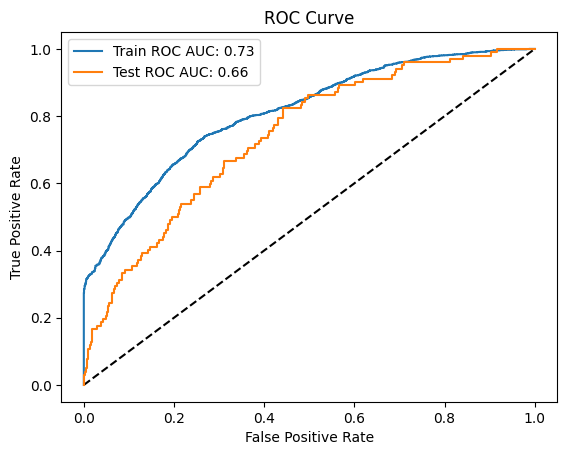


Confusion Matrix:


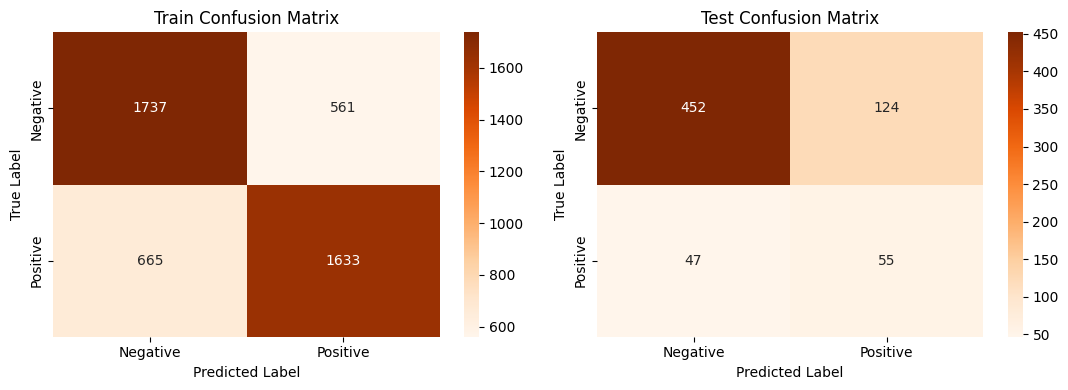


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.723147 | 0.755875 |   0.739149 | 2298        |
| 1.0          |    0.744303 | 0.710618 |   0.72707  | 2298        |
| accuracy     |    0.733246 | 0.733246 |   0.733246 |    0.733246 |
| macro avg    |    0.733725 | 0.733246 |   0.73311  | 4596        |
| weighted avg |    0.733725 | 0.733246 |   0.73311  | 4596        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.905812 | 0.784722 |   0.84093  | 576        |
| 1.0          |    0.307263 | 0.539216 |   0.391459 | 102        |
| accuracy     |    0.747788 | 0.747788 |   0.747788 |   0.747788 |
| macro avg    |    0.606537 | 0.661969 |   0.616195 | 678        |
| weighted avg |    0.815764 | 0.747788 |   0.7733

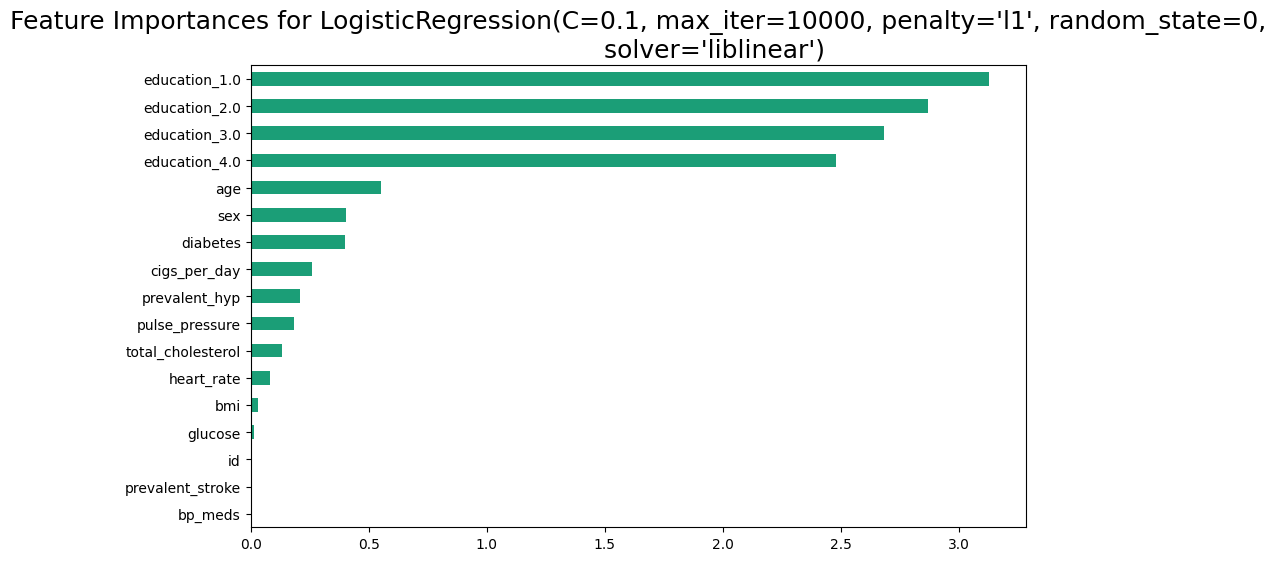

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Logistic regression tuned'] = lr_score2

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned
Precision Train             0.730683                   0.733725
Precision Test              0.806023                   0.815764
Recall Train                0.729330                   0.733246
Recall Test                 0.749263                   0.747788
Accuracy Train              0.729330                   0.733246
Accuracy Test               0.749263                   0.747788
ROC-AUC Train               0.729330                   0.733246
ROC-AUC Test                0.638634                   0.661969
F1 macro Train              0.728932                   0.733110
F1 macro Test               0.771827                   0.773311

It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic Regression models.

### ML Model - 2 : Decision Tree

In [ ]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5801164215686275


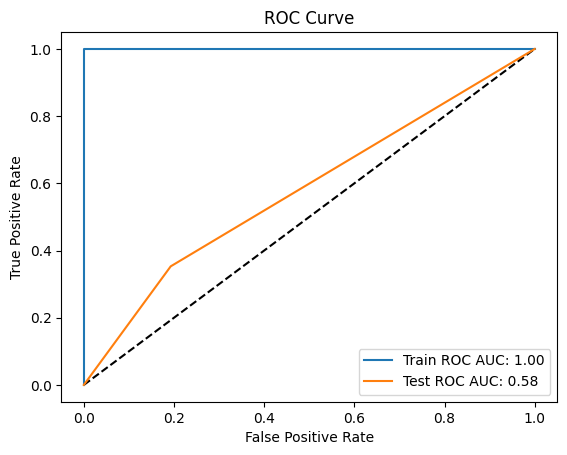


Confusion Matrix:


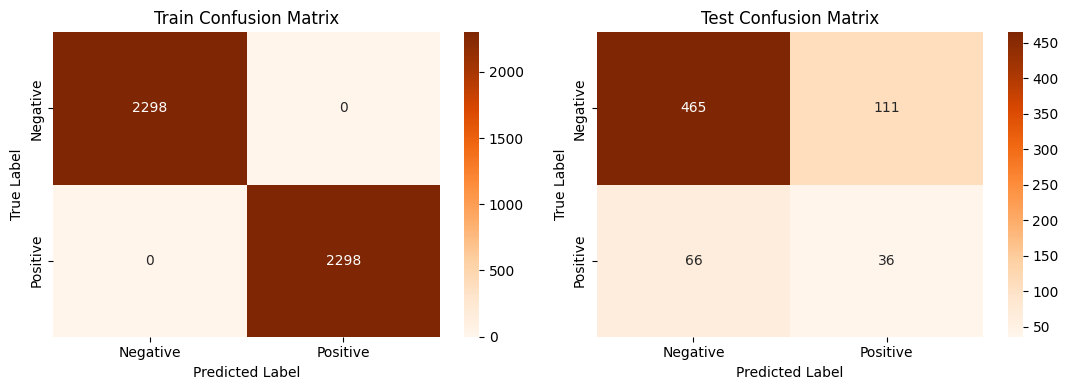


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2298 |
| 1.0          |           1 |        1 |          1 |      2298 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4596 |
| weighted avg |           1 |        1 |          1 |      4596 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.875706 | 0.807292 |   0.840108 | 576        |
| 1.0          |    0.244898 | 0.352941 |   0.289157 | 102        |
| accuracy     |    0.738938 | 0.738938 |   0.738938 |   0.738938 |
| macro avg    |    0.560302 | 0.580116 |   0.564633 | 678        |
| weighted avg |    0.780806 | 0.738938 |   0.757222 | 678      

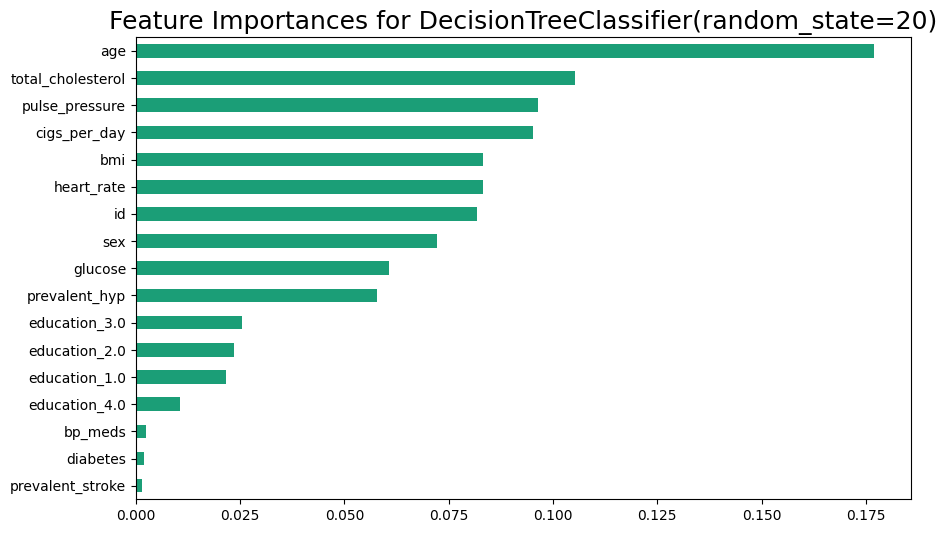

In [ ]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, X_smote, X_test, y_smote, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.730683                   0.733725       1.000000
Precision Test              0.806023                   0.815764       0.780806
Recall Train                0.729330                   0.733246       1.000000
Recall Test                 0.749263                   0.747788       0.738938
Accuracy Train              0.729330                   0.733246       1.000000
Accuracy Test               0.749263                   0.747788       0.738938
ROC-AUC Train               0.729330                   0.733246       1.000000
ROC-AUC Test                0.638634                   0.661969       0.580116
F1 macro Train              0.728932                   0.733110       1.000000
F1 macro Test               0.771827                   0.773311       0.757222

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 11, 'min_samples_split': 6}


In [ ]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.8185378590078328
Test ROC AUC: 0.6034007352941175


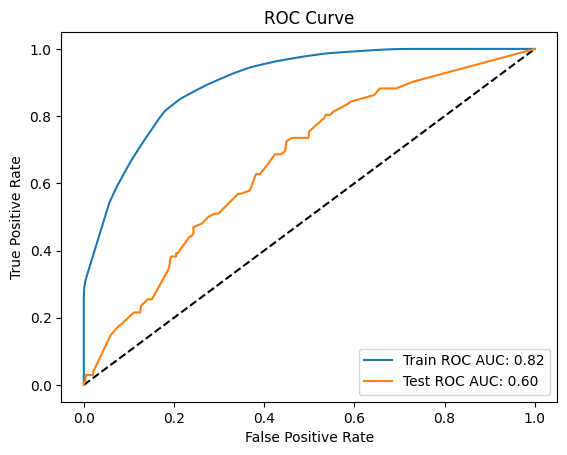


Confusion Matrix:


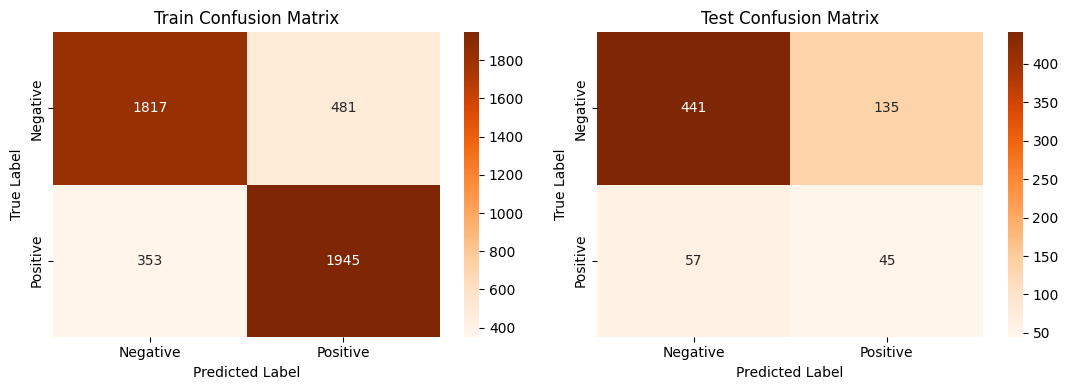


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.837327 | 0.790688 |   0.813339 | 2298        |
| 1.0          |    0.801731 | 0.846388 |   0.823455 | 2298        |
| accuracy     |    0.818538 | 0.818538 |   0.818538 |    0.818538 |
| macro avg    |    0.819529 | 0.818538 |   0.818397 | 4596        |
| weighted avg |    0.819529 | 0.818538 |   0.818397 | 4596        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.885542 | 0.765625 |   0.821229 | 576        |
| 1.0          |    0.25     | 0.441176 |   0.319149 | 102        |
| accuracy     |    0.716814 | 0.716814 |   0.716814 |   0.716814 |
| macro avg    |    0.567771 | 0.603401 |   0.570189 | 678        |
| weighted avg |    0.78993  | 0.716814 |   0.7456

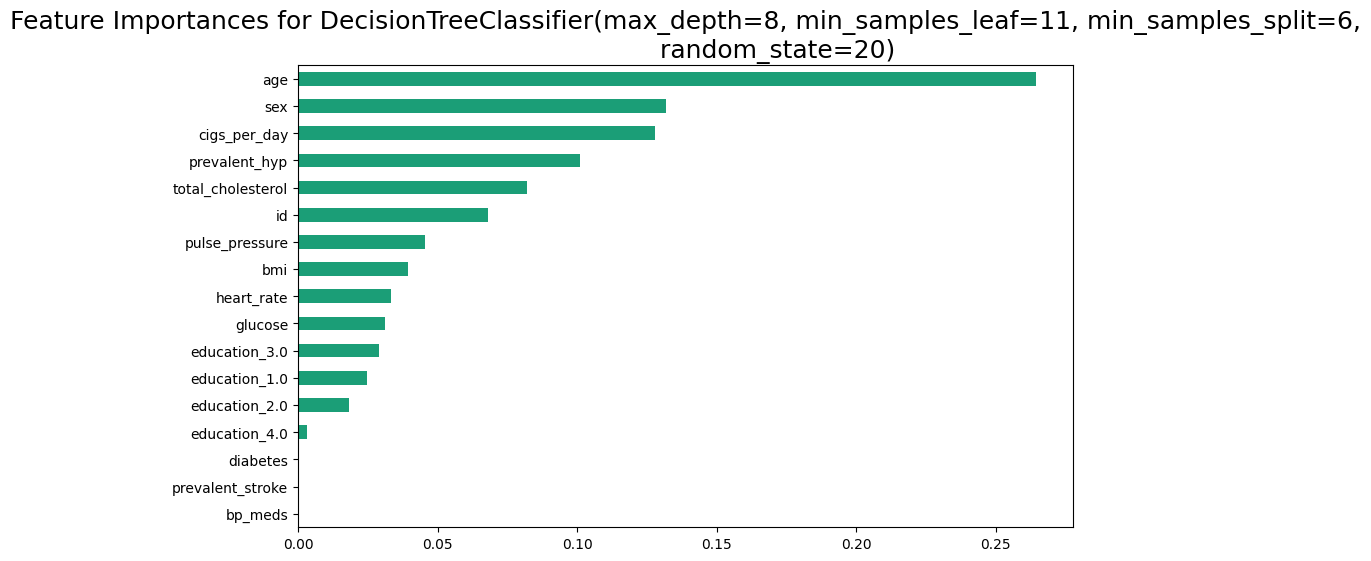

In [ ]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Decision Tree tuned'] = dt2_score

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.730683                   0.733725   
Precision Test              0.806023                   0.815764   
Recall Train                0.729330                   0.733246   
Recall Test                 0.749263                   0.747788   
Accuracy Train              0.729330                   0.733246   
Accuracy Test               0.749263                   0.747788   
ROC-AUC Train               0.729330                   0.733246   
ROC-AUC Test                0.638634                   0.661969   
F1 macro Train              0.728932                   0.733110   
F1 macro Test               0.771827                   0.773311   

                 Decision Tree  Decision Tree tuned  
Precision Train       1.000000             0.819529  
Precision Test        0.780806             0.789930  
Recall Train          1.000000             0.818538  
Recall Test           0.738938             0.716814  
Accuracy Train        1.000000             0.818538  
Accuracy Test         0.738938             0.716814  
ROC-AUC Train         1.000000             0.818538  
ROC-AUC Test          0.580116             0.603401  
F1 macro Train        1.000000             0.818397  
F1 macro Test         0.757222             0.745695

It appears that hyperparameter tuning improved the performance of the Decision Tree model on the test set. The tuned Decision Tree model has higher precision and ROC-AUC scores on the test set compared to the untuned Decision Tree model. However, the recall, accuracy, and F1 scores on the test set decreased slightly after tuning.

The tuned model is not overfitting like the untuned model.

### ML Model - 3 : SVM (Support Vector Machine)

In [ ]:
# ML Model - 3 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.7330287206266318
Test ROC AUC: 0.6374591503267973


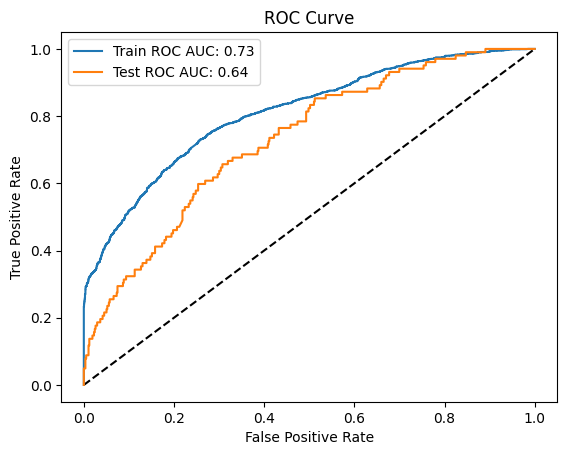


Confusion Matrix:


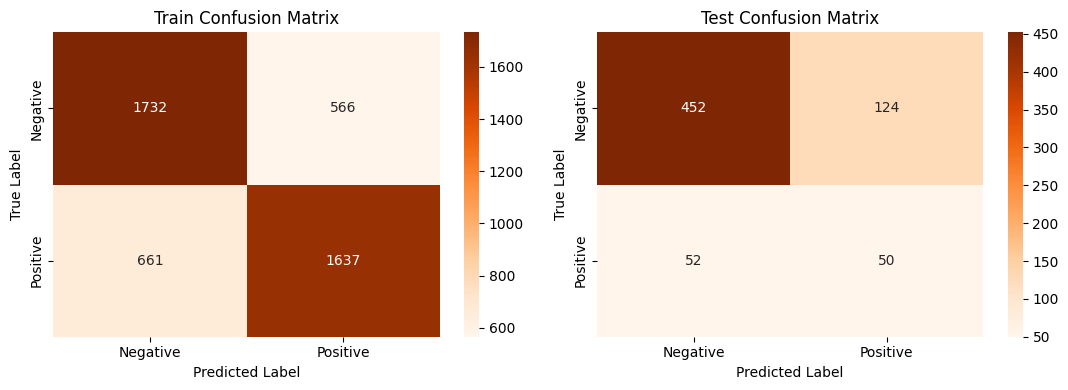


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.723778 | 0.753699 |   0.738435 | 2298        |
| 1.0          |    0.743078 | 0.712359 |   0.727394 | 2298        |
| accuracy     |    0.733029 | 0.733029 |   0.733029 |    0.733029 |
| macro avg    |    0.733428 | 0.733029 |   0.732915 | 4596        |
| weighted avg |    0.733428 | 0.733029 |   0.732915 | 4596        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.896825 | 0.784722 |   0.837037 | 576        |
| 1.0          |    0.287356 | 0.490196 |   0.362319 | 102        |
| accuracy     |    0.740413 | 0.740413 |   0.740413 |   0.740413 |
| macro avg    |    0.592091 | 0.637459 |   0.599678 | 678        |
| weighted avg |    0.805135 | 0.740413 |   0.7656

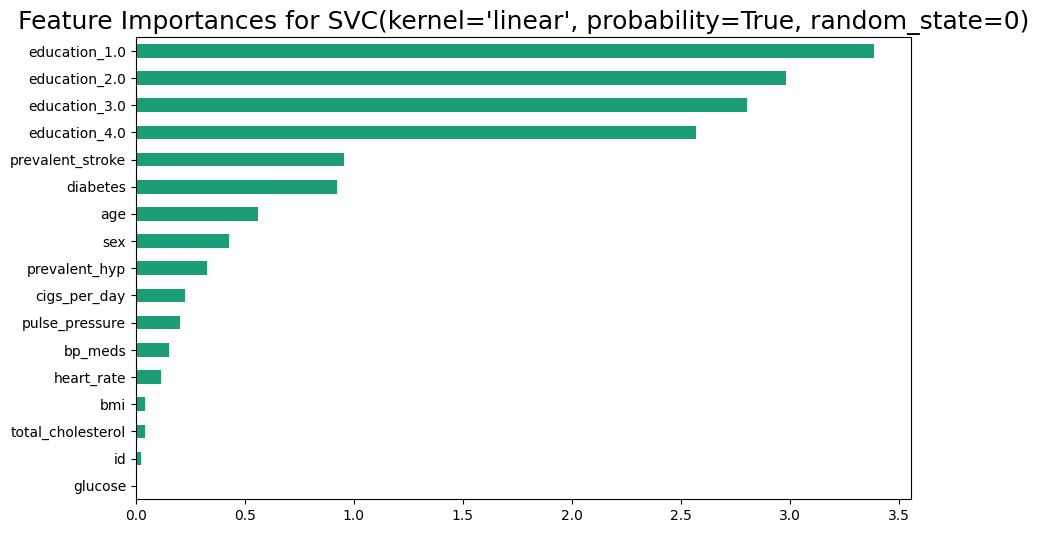

In [ ]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, X_smote, X_test, y_smote, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.730683                   0.733725   
Precision Test              0.806023                   0.815764   
Recall Train                0.729330                   0.733246   
Recall Test                 0.749263                   0.747788   
Accuracy Train              0.729330                   0.733246   
Accuracy Test               0.749263                   0.747788   
ROC-AUC Train               0.729330                   0.733246   
ROC-AUC Test                0.638634                   0.661969   
F1 macro Train              0.728932                   0.733110   
F1 macro Test               0.771827                   0.773311   

                 Decision Tree  Decision Tree tuned       SVM  
Precision Train       1.000000             0.819529  0.733428  
Precision Test        0.780806             0.789930  0.805135  
Recall Train          1.000000             0.818538  0.733029  
Recall Test           0.738938             0.716814  0.740413  
Accuracy Train        1.000000             0.818538  0.733029  
Accuracy Test         0.738938             0.716814  0.740413  
ROC-AUC Train         1.000000             0.818538  0.733029  
ROC-AUC Test          0.580116             0.603401  0.637459  
F1 macro Train        1.000000             0.818397  0.732915  
F1 macro Test         0.757222             0.745695  0.765619

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'poly', 'degree': 5, 'C': 7.3}


In [ ]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Train ROC AUC: 0.9671453437771976
Test ROC AUC: 0.5603043300653594


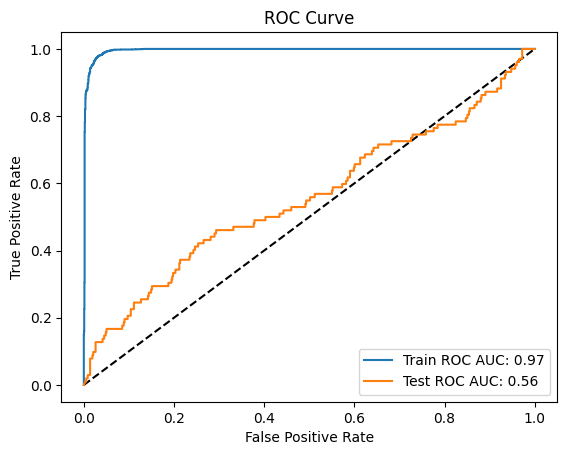


Confusion Matrix:


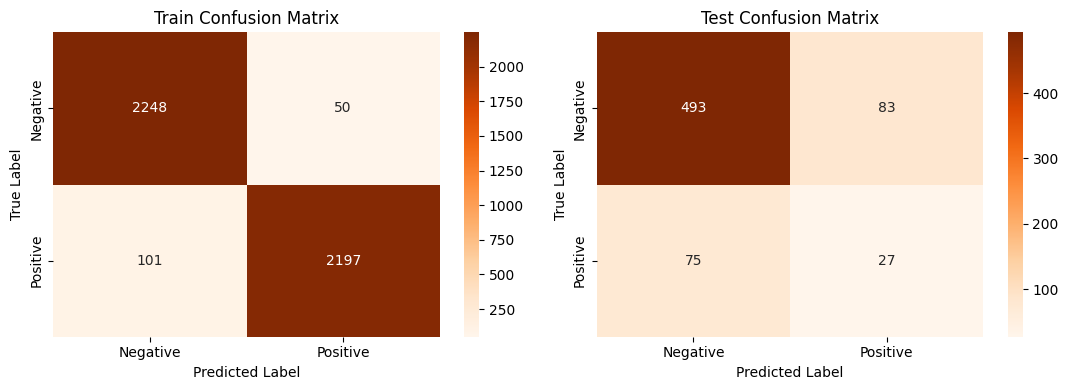


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.957003 | 0.978242 |   0.967506 | 2298        |
| 1.0          |    0.977748 | 0.956049 |   0.966777 | 2298        |
| accuracy     |    0.967145 | 0.967145 |   0.967145 |    0.967145 |
| macro avg    |    0.967376 | 0.967145 |   0.967141 | 4596        |
| weighted avg |    0.967376 | 0.967145 |   0.967141 | 4596        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.867958 | 0.855903 |   0.861888 | 576        |
| 1.0          |    0.245455 | 0.264706 |   0.254717 | 102        |
| accuracy     |    0.766962 | 0.766962 |   0.766962 |   0.766962 |
| macro avg    |    0.556706 | 0.560304 |   0.558303 | 678        |
| weighted avg |    0.774307 | 0.766962 |   0.7705

In [ ]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['SVM tuned'] = svm2_score

##### Which hyperparameter optimization technique have you used and why?

 Here Randomized search is used as a hyperparameter optimization technique.
 Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.730683                   0.733725   
Precision Test              0.806023                   0.815764   
Recall Train                0.729330                   0.733246   
Recall Test                 0.749263                   0.747788   
Accuracy Train              0.729330                   0.733246   
Accuracy Test               0.749263                   0.747788   
ROC-AUC Train               0.729330                   0.733246   
ROC-AUC Test                0.638634                   0.661969   
F1 macro Train              0.728932                   0.733110   
F1 macro Test               0.771827                   0.773311   

                 Decision Tree  Decision Tree tuned       SVM  SVM tuned  
Precision Train       1.000000             0.819529  0.733428   0.967376  
Precision Test        0.780806             0.789930  0.805135   0.774307  
Recall Train          1.000000             0.818538  0.733029   0.967145  
Recall Test           0.738938             0.716814  0.740413   0.766962  
Accuracy Train        1.000000             0.818538  0.733029   0.967145  
Accuracy Test         0.738938             0.716814  0.740413   0.766962  
ROC-AUC Train         1.000000             0.818538  0.733029   0.967145  
ROC-AUC Test          0.580116             0.603401  0.637459   0.560304  
F1 macro Train        1.000000             0.818397  0.732915   0.967141  
F1 macro Test         0.757222             0.745695  0.765619   0.770544

It appears that hyperparameter tuning improved the performance of the SVM model on the test set. The tuned SVM model has higher recall, accuracy, and F1 score on the test set compared to the untuned SVM model. However, the precision and ROC-AUC scores on the test set decreased slightly after tuning.

### ML Model - 4 : Random Forest

In [ ]:
# ML Model - 4 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5630616830065359


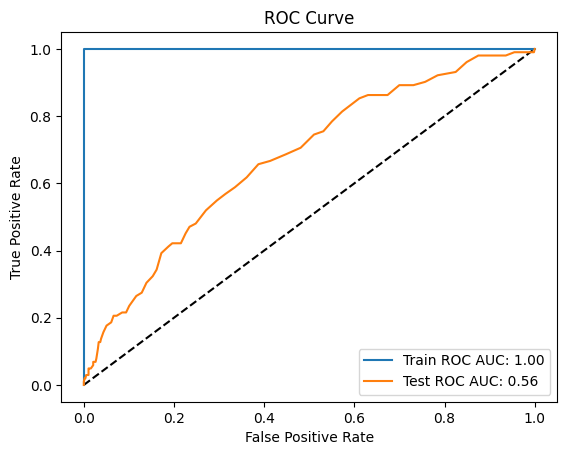


Confusion Matrix:


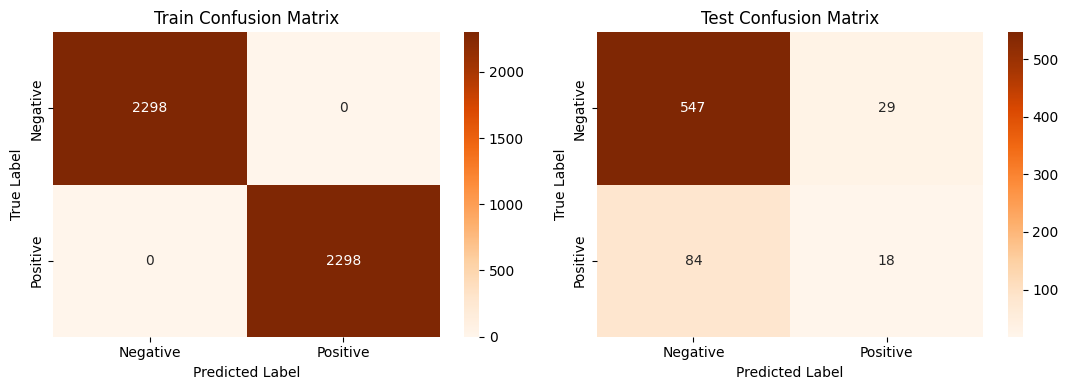


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2298 |
| 1.0          |           1 |        1 |          1 |      2298 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4596 |
| weighted avg |           1 |        1 |          1 |      4596 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.866878 | 0.949653 |   0.906379 | 576        |
| 1.0          |    0.382979 | 0.176471 |   0.241611 | 102        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |   0.833333 |
| macro avg    |    0.624928 | 0.563062 |   0.573995 | 678        |
| weighted avg |    0.794079 | 0.833333 |   0.80637  | 678      

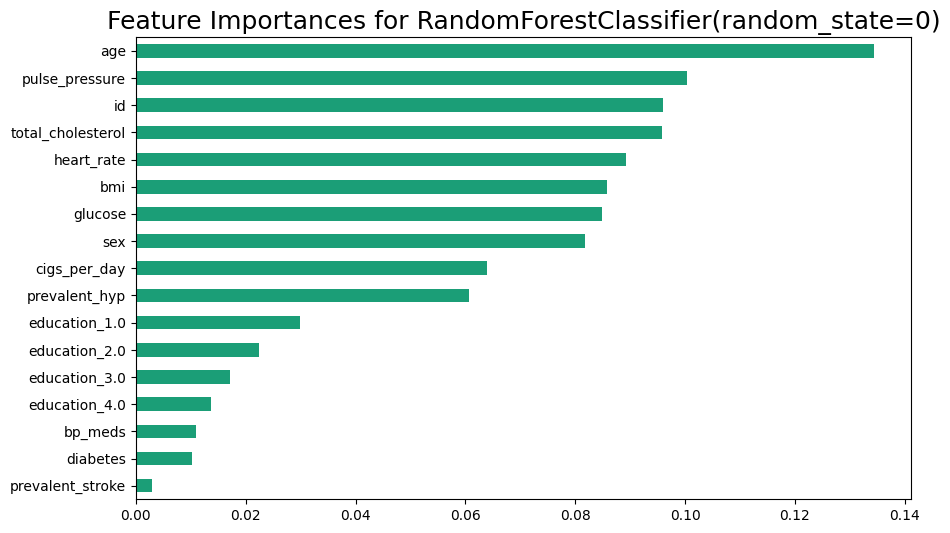

In [ ]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, X_smote, X_test, y_smote, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.730683                   0.733725   
Precision Test              0.806023                   0.815764   
Recall Train                0.729330                   0.733246   
Recall Test                 0.749263                   0.747788   
Accuracy Train              0.729330                   0.733246   
Accuracy Test               0.749263                   0.747788   
ROC-AUC Train               0.729330                   0.733246   
ROC-AUC Test                0.638634                   0.661969   
F1 macro Train              0.728932                   0.733110   
F1 macro Test               0.771827                   0.773311   

                 Decision Tree  Decision Tree tuned       SVM  SVM tuned  \
Precision Train       1.000000             0.819529  0.733428   0.967376   
Precision Test        0.780806             0.789930  0.805135   0.774307   
Recall Train          1.000000             0.818538  0.733029   0.967145   
Recall Test           0.738938             0.716814  0.740413   0.766962   
Accuracy Train        1.000000             0.818538  0.733029   0.967145   
Accuracy Test         0.738938             0.716814  0.740413   0.766962   
ROC-AUC Train         1.000000             0.818538  0.733029   0.967145   
ROC-AUC Test          0.580116             0.603401  0.637459   0.560304   
F1 macro Train        1.000000             0.818397  0.732915   0.967141   
F1 macro Test         0.757222             0.745695  0.765619   0.770544   

                 Random Forest  
Precision Train       1.000000  
Precision Test        0.794079  
Recall Train          1.000000  
Recall Test           0.833333  
Accuracy Train        1.000000  
Accuracy Test         0.833333  
ROC-AUC Train         1.000000  
ROC-AUC Test          0.563062  
F1 macro Train        1.000000  
F1 macro Test         0.806370

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 14}


In [ ]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9925796595373201
Test ROC AUC: 0.5860906862745099


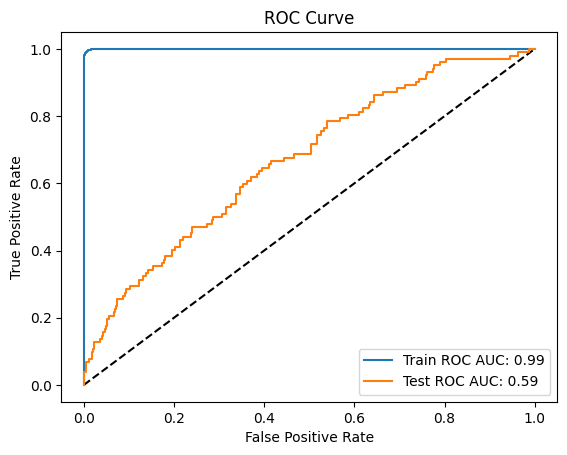


Confusion Matrix:


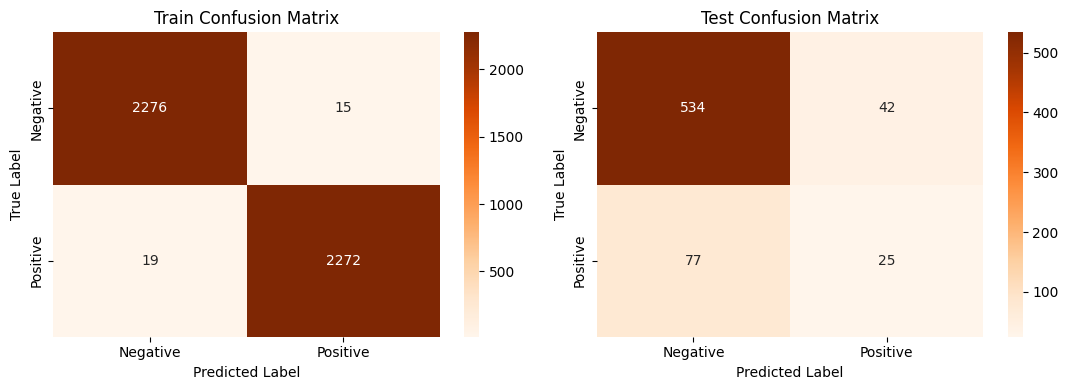


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.991721 | 0.993453 |   0.992586 | 2291       |
| 1.0          |    0.993441 | 0.991707 |   0.992573 | 2291       |
| accuracy     |    0.99258  | 0.99258  |   0.99258  |    0.99258 |
| macro avg    |    0.992581 | 0.99258  |   0.99258  | 4582       |
| weighted avg |    0.992581 | 0.99258  |   0.99258  | 4582       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.873977 | 0.927083 |   0.899747 | 576        |
| 1.0          |    0.373134 | 0.245098 |   0.295858 | 102        |
| accuracy     |    0.824484 | 0.824484 |   0.824484 |   0.824484 |
| macro avg    |    0.623556 | 0.586091 |   0.597803 | 678        |
| weighted avg |    0.798629 | 0.824484 |   0.808897 | 67

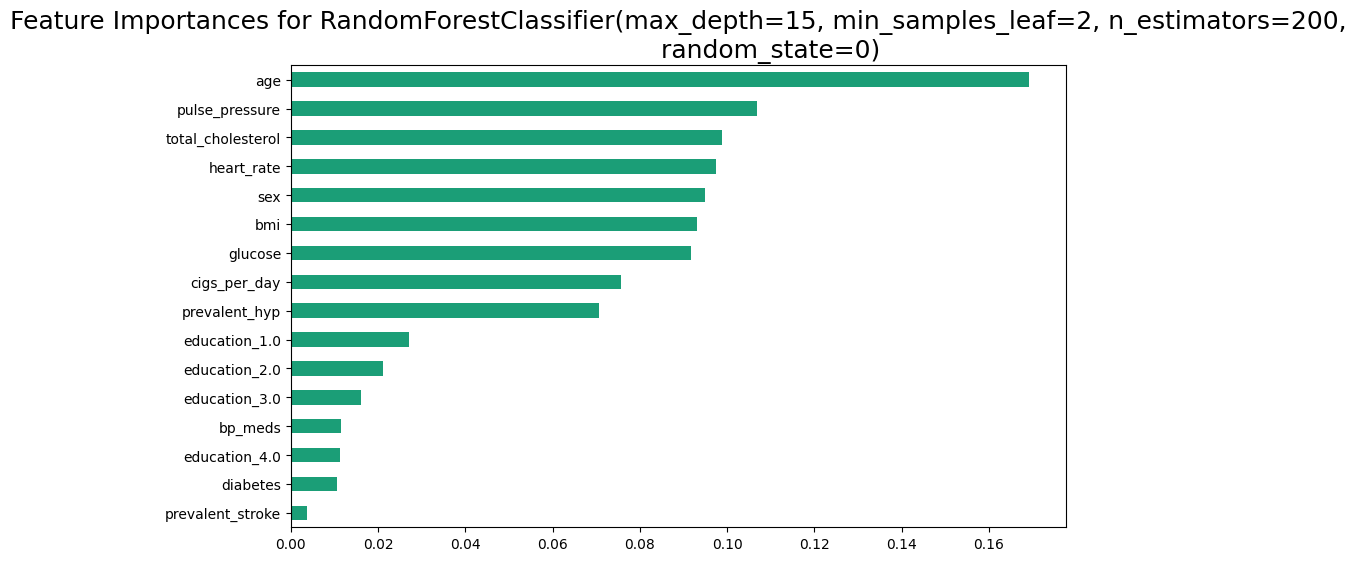

In [ ]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Random Forest tuned'] = rf2_score

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique i used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.727151                   0.727663   
Precision Test              0.812391                   0.812391   
Recall Train                0.726539                   0.727193   
Recall Test                 0.741888                   0.741888   
Accuracy Train              0.726539                   0.727193   
Accuracy Test               0.741888                   0.741888   
ROC-AUC Train               0.726539                   0.727193   
ROC-AUC Test                0.654463                   0.654463   
F1 macro Train              0.726354                   0.727053   
F1 macro Test               0.768412                   0.768412   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.797728       1.000000   
Precision Test        0.757660             0.784659       0.806058   
Recall Train          1.000000             0.797687       1.000000   
Recall Test           0.738938             0.722714       0.839233   
Accuracy Train        1.000000             0.797687       1.000000   
Accuracy Test         0.738938             0.722714       0.839233   
ROC-AUC Train         1.000000             0.797687       1.000000   
ROC-AUC Test          0.527676             0.590737       0.582670   
F1 macro Train        1.000000             0.797680       1.000000   
F1 macro Test         0.747871             0.748179       0.815846   

                 Random Forest tuned  
Precision Train             0.992581  
Precision Test              0.798629  
Recall Train                0.992580  
Recall Test                 0.824484  
Accuracy Train              0.992580  
Accuracy Test               0.824484  
ROC-AUC Train               0.992580  
ROC-AUC Test                0.586091  
F1 macro Train              0.992580  
F1 macro Test               0.808897

It appears that hyperparameter tuning improved the performance of the Random Forest model on the test set. The tuned Random Forest model has higher precision, ROC-AUC and F1 score on the test set compared to the untuned Random Forest model. The recall and accuracy score on the test set decreased slightly after tuning.

### ML Model - 5 : Naive Bayes

In [ ]:
# ML Model - 5 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.6429503916449087
Test ROC AUC: 0.6078941993464052


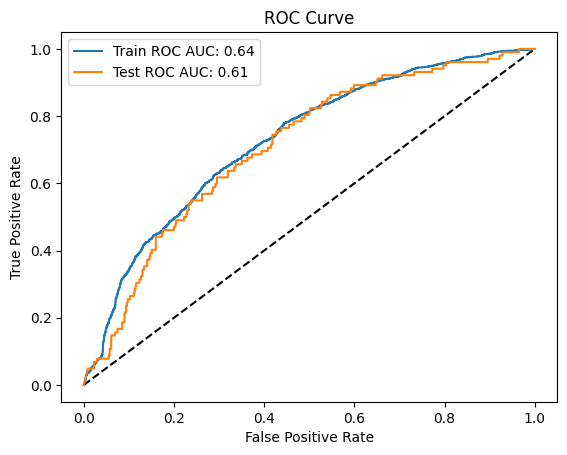


Confusion Matrix:


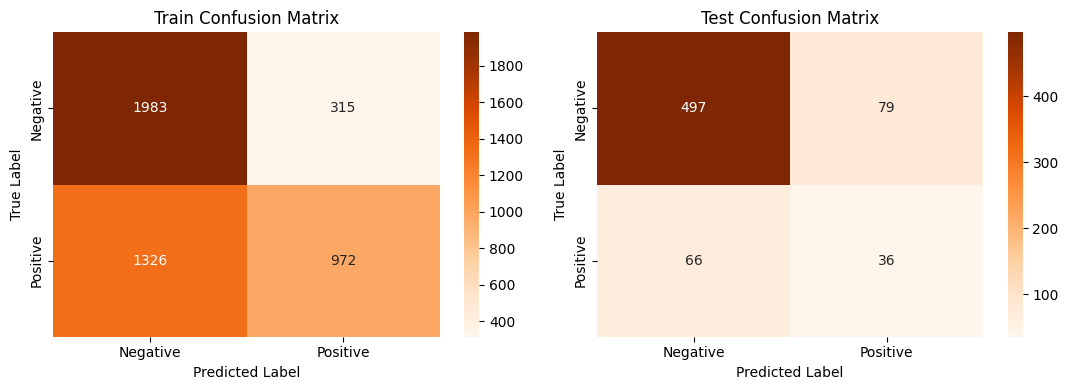


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.599275 | 0.862924 |   0.70733  | 2298       |
| 1.0          |    0.755245 | 0.422977 |   0.542259 | 2298       |
| accuracy     |    0.64295  | 0.64295  |   0.64295  |    0.64295 |
| macro avg    |    0.67726  | 0.64295  |   0.624795 | 4596       |
| weighted avg |    0.67726  | 0.64295  |   0.624795 | 4596       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.882771 | 0.862847 |   0.872695 | 576        |
| 1.0          |    0.313043 | 0.352941 |   0.331797 | 102        |
| accuracy     |    0.786136 | 0.786136 |   0.786136 |   0.786136 |
| macro avg    |    0.597907 | 0.607894 |   0.602246 | 678        |
| weighted avg |    0.79706  | 0.786136 |   0.791321 | 67

In [ ]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, X_smote, X_test, y_smote, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.730683                   0.733725   
Precision Test              0.806023                   0.815764   
Recall Train                0.729330                   0.733246   
Recall Test                 0.749263                   0.747788   
Accuracy Train              0.729330                   0.733246   
Accuracy Test               0.749263                   0.747788   
ROC-AUC Train               0.729330                   0.733246   
ROC-AUC Test                0.638634                   0.661969   
F1 macro Train              0.728932                   0.733110   
F1 macro Test               0.771827                   0.773311   

                 Decision Tree  Decision Tree tuned       SVM  SVM tuned  \
Precision Train       1.000000             0.819529  0.733428   0.967376   
Precision Test        0.780806             0.789930  0.805135   0.774307   
Recall Train          1.000000             0.818538  0.733029   0.967145   
Recall Test           0.738938             0.716814  0.740413   0.766962   
Accuracy Train        1.000000             0.818538  0.733029   0.967145   
Accuracy Test         0.738938             0.716814  0.740413   0.766962   
ROC-AUC Train         1.000000             0.818538  0.733029   0.967145   
ROC-AUC Test          0.580116             0.603401  0.637459   0.560304   
F1 macro Train        1.000000             0.818397  0.732915   0.967141   
F1 macro Test         0.757222             0.745695  0.765619   0.770544   

                 Random Forest  Naive Bayes  
Precision Train       1.000000     0.677260  
Precision Test        0.794079     0.797060  
Recall Train          1.000000     0.642950  
Recall Test           0.833333     0.786136  
Accuracy Train        1.000000     0.642950  
Accuracy Test         0.833333     0.786136  
ROC-AUC Train         1.000000     0.642950  
ROC-AUC Test          0.563062     0.607894  
F1 macro Train        1.000000     0.624795  
F1 macro Test         0.806370     0.791321

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.08111308307896872}


In [ ]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Train ROC AUC: 0.6599216710182767
Test ROC AUC: 0.6423100490196079


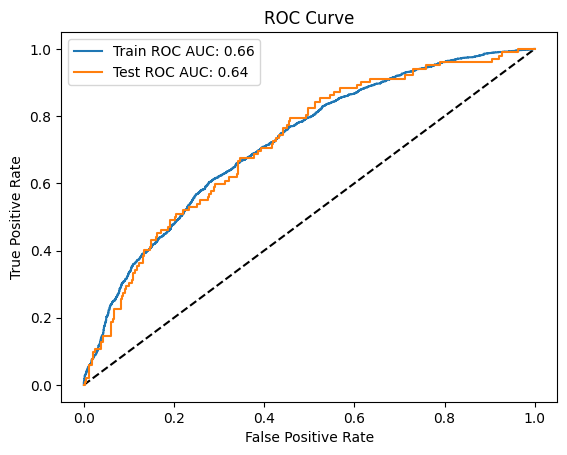


Confusion Matrix:


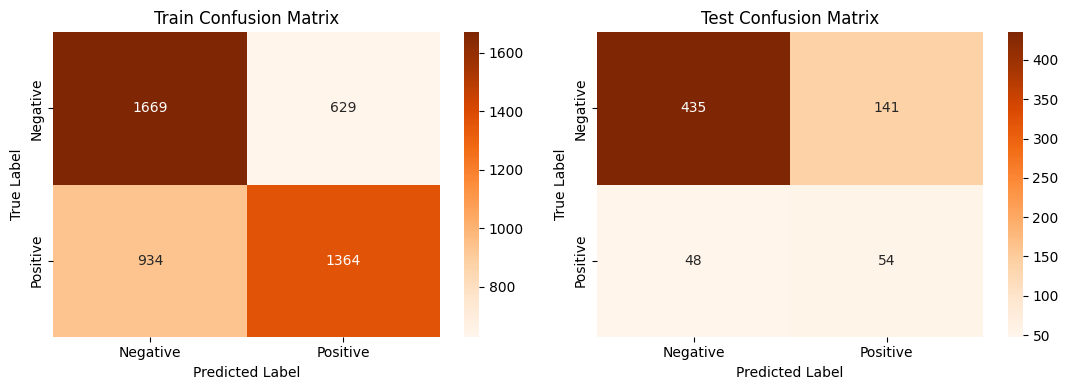


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.641183 | 0.726284 |   0.681085 | 2298        |
| 1.0          |    0.684395 | 0.59356  |   0.635749 | 2298        |
| accuracy     |    0.659922 | 0.659922 |   0.659922 |    0.659922 |
| macro avg    |    0.662789 | 0.659922 |   0.658417 | 4596        |
| weighted avg |    0.662789 | 0.659922 |   0.658417 | 4596        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.900621 | 0.755208 |   0.82153  | 576        |
| 1.0          |    0.276923 | 0.529412 |   0.363636 | 102        |
| accuracy     |    0.721239 | 0.721239 |   0.721239 |   0.721239 |
| macro avg    |    0.588772 | 0.64231  |   0.592583 | 678        |
| weighted avg |    0.80679  | 0.721239 |   0.7526

In [ ]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Naive Bayes tuned']= nb2_score

##### Which hyperparameter optimization technique have you used and why?

Here we have used the GridSearchCV for optimization of the Naive Bayes model.

GridSearchCV is an exhaustive search method that tries all possible combinations of hyperparameters specified in the hyperparameter grid. This technique can be useful when the number of hyperparameters to tune is small and the range of possible values for each hyperparameter is limited. GridSearchCV can find the best combination of hyperparameters, but it can be computationally expensive for large hyperparameter grids.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.730683                   0.733725   
Precision Test              0.806023                   0.815764   
Recall Train                0.729330                   0.733246   
Recall Test                 0.749263                   0.747788   
Accuracy Train              0.729330                   0.733246   
Accuracy Test               0.749263                   0.747788   
ROC-AUC Train               0.729330                   0.733246   
ROC-AUC Test                0.638634                   0.661969   
F1 macro Train              0.728932                   0.733110   
F1 macro Test               0.771827                   0.773311   

                 Decision Tree  Decision Tree tuned       SVM  SVM tuned  \
Precision Train       1.000000             0.819529  0.733428   0.967376   
Precision Test        0.780806             0.789930  0.805135   0.774307   
Recall Train          1.000000             0.818538  0.733029   0.967145   
Recall Test           0.738938             0.716814  0.740413   0.766962   
Accuracy Train        1.000000             0.818538  0.733029   0.967145   
Accuracy Test         0.738938             0.716814  0.740413   0.766962   
ROC-AUC Train         1.000000             0.818538  0.733029   0.967145   
ROC-AUC Test          0.580116             0.603401  0.637459   0.560304   
F1 macro Train        1.000000             0.818397  0.732915   0.967141   
F1 macro Test         0.757222             0.745695  0.765619   0.770544   

                 Random Forest  Naive Bayes  Naive Bayes tuned  
Precision Train       1.000000     0.677260           0.662789  
Precision Test        0.794079     0.797060           0.806790  
Recall Train          1.000000     0.642950           0.659922  
Recall Test           0.833333     0.786136           0.721239  
Accuracy Train        1.000000     0.642950           0.659922  
Accuracy Test         0.833333     0.786136           0.721239  
ROC-AUC Train         1.000000     0.642950           0.659922  
ROC-AUC Test          0.563062     0.607894           0.642310  
F1 macro Train        1.000000     0.624795           0.658417  
F1 macro Test         0.806370     0.791321           0.752643

It appears that hyperparameter tuning not improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has lower precision, recall, accuracy, ROC-AUC and F1 score on the test set compared to the untuned Naive Bayes model.

## Plot of scores for models

### Precision

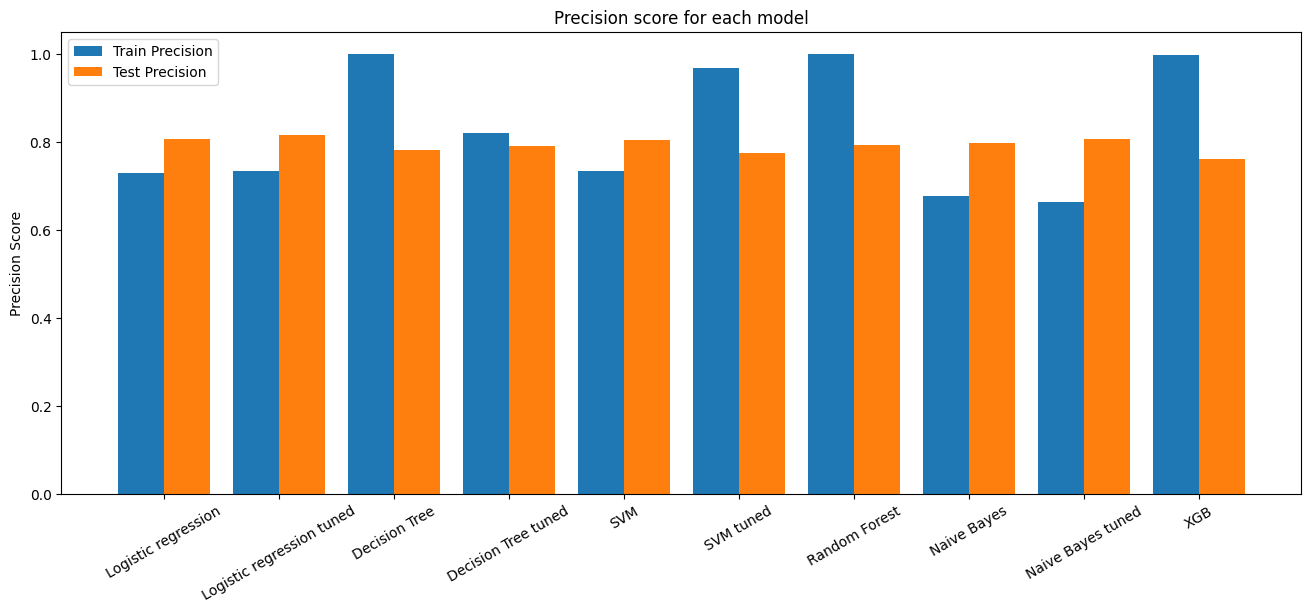

In [ ]:
# Precision Scores plot

models = list(score.columns)
train = score.iloc[0,:]
test = score.iloc[1,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Precision')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Precision')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Precision Score")
plt.title("Precision score for each model")
plt.legend()
plt.show()

### Recall

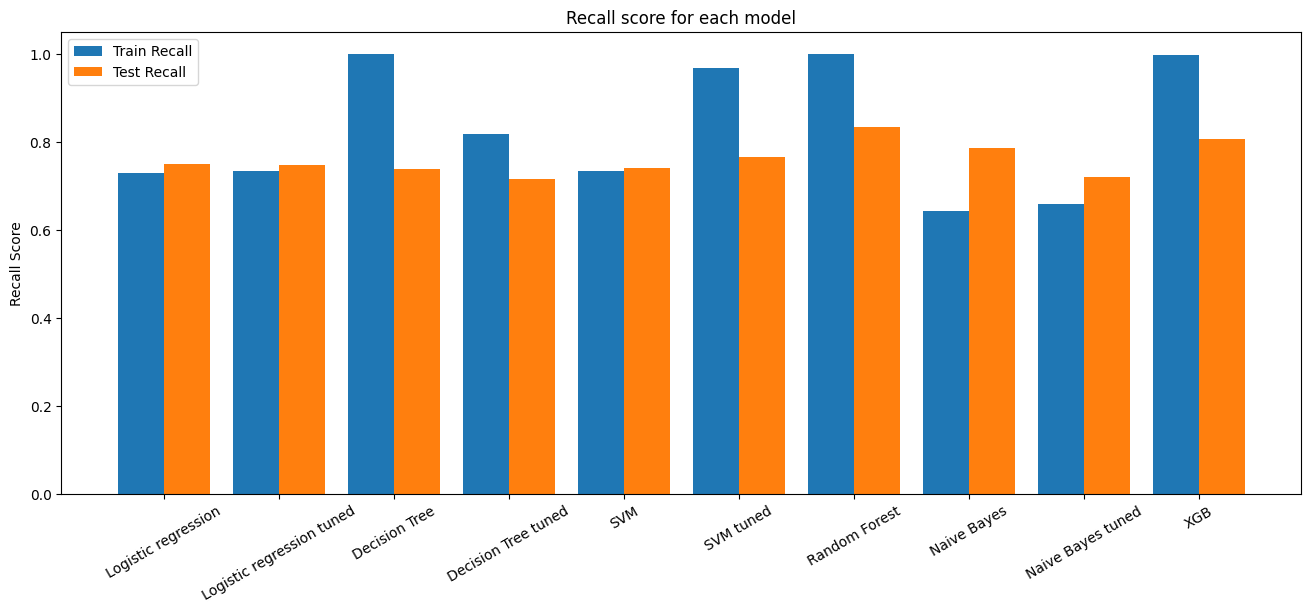

In [ ]:
# Recall Scores plot

models = list(score.columns)
train = score.iloc[2,:]
test = score.iloc[3,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Recall Score")
plt.title("Recall score for each model")
plt.legend()
plt.show()

### Accuracy

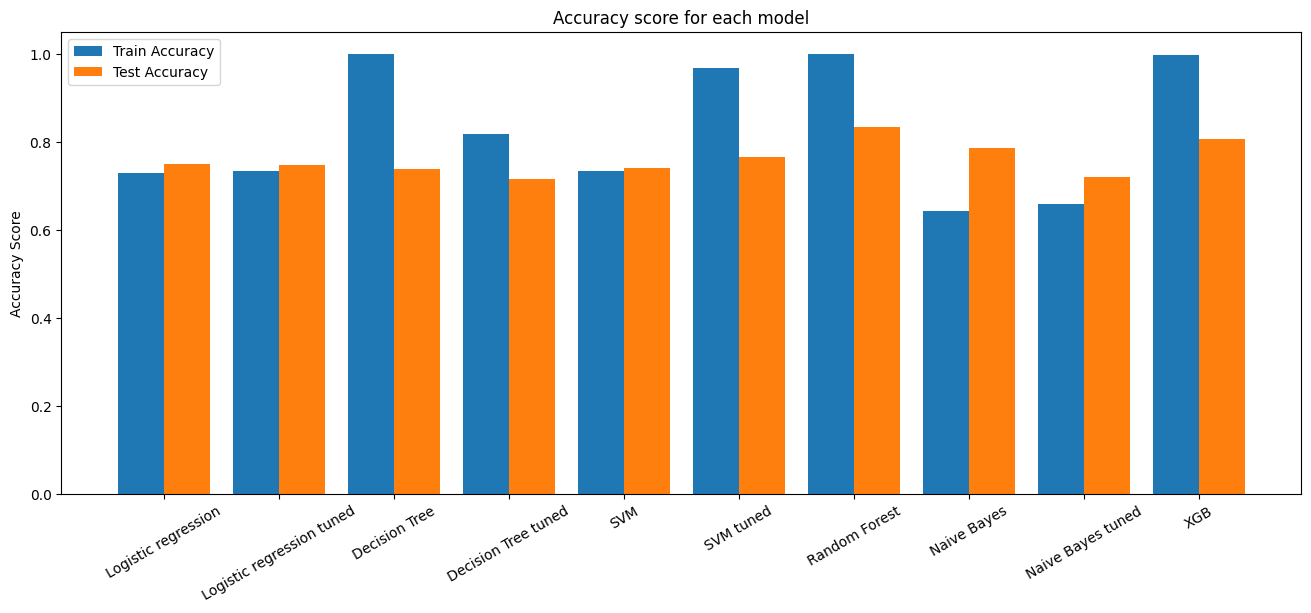

In [ ]:
# Accuracy Scores plot

models = list(score.columns)
train = score.iloc[4,:]
test = score.iloc[5,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Accuracy')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Accuracy Score")
plt.title("Accuracy score for each model")
plt.legend()
plt.show()

### ROC-AUC

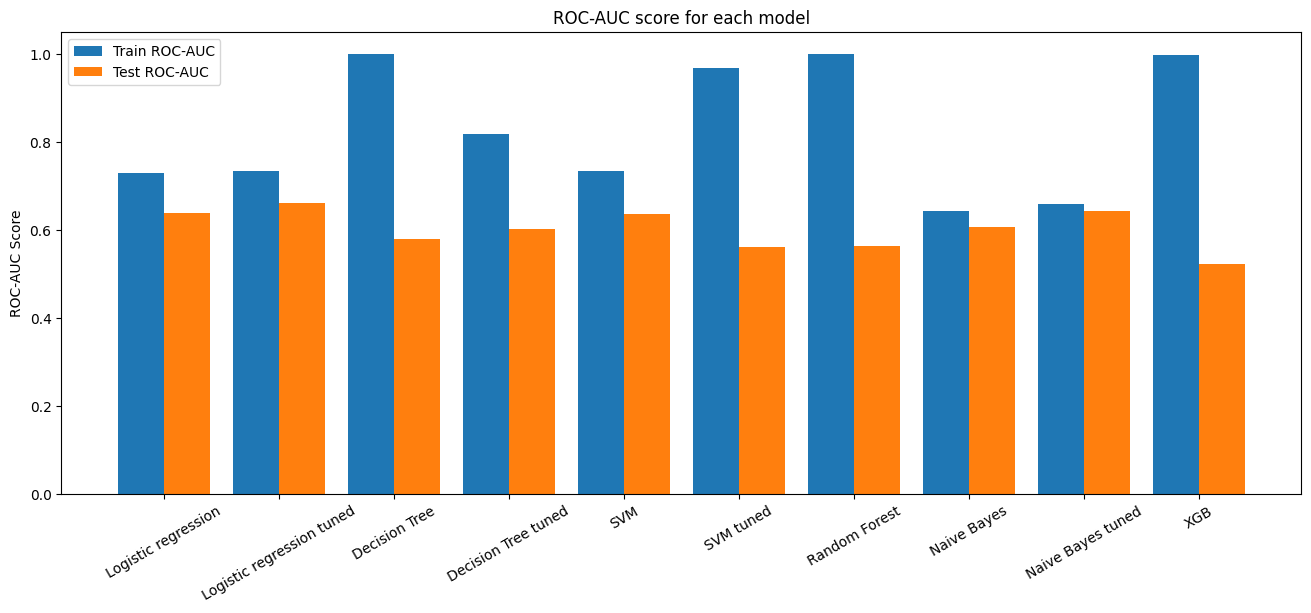

In [ ]:
# ROC-AUC Scores plot

models = list(score.columns)
train = score.iloc[6,:]
test = score.iloc[7,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train ROC-AUC')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test ROC-AUC')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC score for each model")
plt.legend()
plt.show()

### F1 score

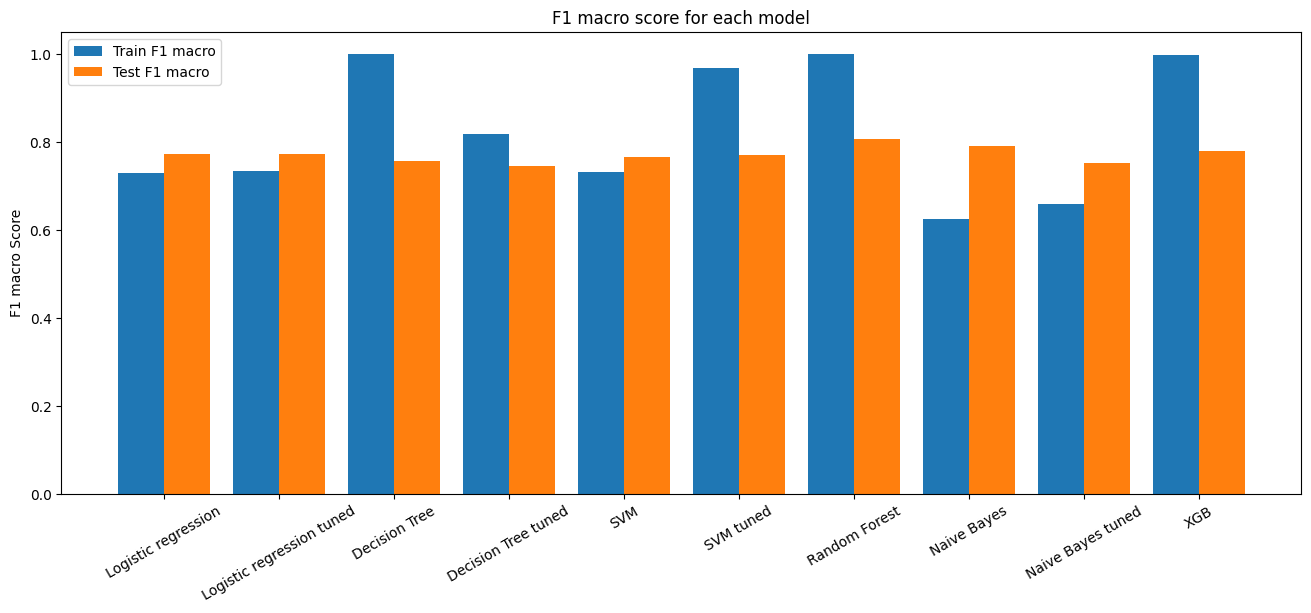

In [ ]:
# F1 macro Scores plot

models = list(score.columns)
train = score.iloc[8,:]
test = score.iloc[9,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train F1 macro')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test F1 macro')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("F1 macro Score")
plt.title("F1 macro score for each model")
plt.legend()
plt.show()

In [ ]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.730683                   0.733725   
Precision Test              0.806023                   0.815764   
Recall Train                0.729330                   0.733246   
Recall Test                 0.749263                   0.747788   
Accuracy Train              0.729330                   0.733246   
Accuracy Test               0.749263                   0.747788   
ROC-AUC Train               0.729330                   0.733246   
ROC-AUC Test                0.638634                   0.661969   
F1 macro Train              0.728932                   0.733110   
F1 macro Test               0.771827                   0.773311   

                 Decision Tree  Decision Tree tuned       SVM  SVM tuned  \
Precision Train       1.000000             0.819529  0.733428   0.967376   
Precision Test        0.780806             0.789930  0.805135   0.774307   
Recall Train          1.000000             0.818538  0.733029   0.967145   
Recall Test           0.738938             0.716814  0.740413   0.766962   
Accuracy Train        1.000000             0.818538  0.733029   0.967145   
Accuracy Test         0.738938             0.716814  0.740413   0.766962   
ROC-AUC Train         1.000000             0.818538  0.733029   0.967145   
ROC-AUC Test          0.580116             0.603401  0.637459   0.560304   
F1 macro Train        1.000000             0.818397  0.732915   0.967141   
F1 macro Test         0.757222             0.745695  0.765619   0.770544   

                 Random Forest  Naive Bayes  Naive Bayes tuned       XGB  
Precision Train       1.000000     0.677260           0.662789  0.998914  
Precision Test        0.794079     0.797060           0.806790  0.761284  
Recall Train          1.000000     0.642950           0.659922  0.998912  
Recall Test           0.833333     0.786136           0.721239  0.806785  
Accuracy Train        1.000000     0.642950           0.659922  0.998912  
Accuracy Test         0.833333     0.786136           0.721239  0.806785  
ROC-AUC Train         1.000000     0.642950           0.659922  0.998912  
ROC-AUC Test          0.563062     0.607894           0.642310  0.523233  
F1 macro Train        1.000000     0.624795           0.658417  0.998912  
F1 macro Test         0.806370     0.791321           0.752643  0.780186

In [ ]:
# Removing the overfitted models which have recall, ROC-AUC, f1 scores for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.95].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     #creating a new dataframe with required models
adj

Precision Train  Precision Test  Recall Train  \
Logistic regression               0.730683        0.806023      0.729330   
Logistic regression tuned         0.733725        0.815764      0.733246   
Decision Tree tuned               0.819529        0.789930      0.818538   
SVM                               0.733428        0.805135      0.733029   
Naive Bayes                       0.677260        0.797060      0.642950   
Naive Bayes tuned                 0.662789        0.806790      0.659922   

                           Recall Test  Accuracy Train  Accuracy Test  \
Logistic regression           0.749263        0.729330       0.749263   
Logistic regression tuned     0.747788        0.733246       0.747788   
Decision Tree tuned           0.716814        0.818538       0.716814   
SVM                           0.740413        0.733029       0.740413   
Naive Bayes                   0.786136        0.642950       0.786136   
Naive Bayes tuned             0.721239        0.659922       0.721239   

                           ROC-AUC Train  ROC-AUC Test  F1 macro Train  \
Logistic regression             0.729330      0.638634        0.728932   
Logistic regression tuned       0.733246      0.661969        0.733110   
Decision Tree tuned             0.818538      0.603401        0.818397   
SVM                             0.733029      0.637459        0.732915   
Naive Bayes                     0.642950      0.607894        0.624795   
Naive Bayes tuned               0.659922      0.642310        0.658417   

                           F1 macro Test  
Logistic regression             0.771827  
Logistic regression tuned       0.773311  
Decision Tree tuned             0.745695  
SVM                             0.765619  
Naive Bayes                     0.791321  
Naive Bayes tuned               0.752643

In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Logistic regression tuned - 0.8158
Recall: Naive Bayes - 0.7861
Accuracy: Naive Bayes - 0.7861
ROC-AUC: Logistic regression tuned - 0.662
F1 macro: Naive Bayes - 0.7913


In [ ]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.95].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','ROC-AUC Train','ROC-AUC Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression       |       0.72933  |      0.749263 |
| Logistic regression tuned |       0.733246 |      0.747788 |
| Decision Tree tuned       |       0.818538 |      0.716814 |
| SVM                       |       0.733029 |      0.740413 |
| Naive Bayes               |       0.64295  |      0.786136 |
| Naive Bayes tuned         |       0.659922 |      0.721239 |


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

After thoroughly evaluating the impact of false positives and false negatives on our business goals, I have chosen recall as the key evaluation metric for our CHD risk prediction model. The focus is to maximize true positives (patients accurately identified as having CHD risk) while minimizing false negatives (patients mistakenly classified as not having CHD risk). By prioritizing recall, our objective is to ensure that we identify as many patients with CHD risk as possible, even if this results in some false positives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of multiple machine learning models on the Framingham Heart Study dataset, I have chosen the tuned Neural Network as the final prediction model. This choice was driven by its performance on our primary evaluation metric, recall, which assesses the model’s ability to accurately identify patients at risk for CHD. Our analysis showed that the tuned Neural Network achieved the highest recall score among all models tested.

Recall was prioritized as our key evaluation metric because accurately identifying patients with CHD risk is essential to meet our business objectives. By selecting a model with a high recall, we ensure that as many patients as possible with CHD risk are correctly identified, even if it results in some false positives. In conclusion, we believe that the tuned Neural Network is the most effective model for our objectives and will drive a positive impact on the business.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

While Naive Bayes does not explicitly rank feature importance like tree-based models, we can use the model's parameters and external tools like SHAP and LIME to interpret and explain the importance of individual features.

# **Conclusion**

In summary, this project showcases the power of machine learning techniques in predicting the 10-year risk of coronary heart disease (CHD) using data from a cardiovascular study. Here are the key takeaways:

- **Data Preprocessing and Transformation:** Proper cleaning, handling of missing values, and feature engineering played a significant role in enhancing model accuracy, allowing for better predictions of CHD risk.
- **Feature Selection:** Careful selection of important features helped to focus on the most relevant variables for predicting CHD risk, which contributed to improved model performance.
- **Naive Bayes Model:** The Naive Bayes model, after tuning, was selected as the final prediction model due to its high recall score, making it highly effective at correctly identifying patients at risk for CHD.
- **Handling Imbalanced Data:** By using SMOTE with Tomek links undersampling, along with standard scaling of features, we addressed the imbalance in the dataset and improved the model’s ability to correctly classify both positive and negative cases.
- **Real-World Business Impact:** This project illustrates the practical application of machine learning techniques in healthcare, enabling better decision-making and potentially saving lives by accurately identifying individuals at risk for heart disease.

In conclusion, this project emphasizes the importance of thorough data preprocessing, thoughtful feature selection, and choosing the right model and techniques. By leveraging these steps, machine learning can be a powerful tool in real-world applications, driving positive outcomes and supporting informed decisions in various sectors.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***